# Telecom Churn Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

## Definitions of Churn

There are various ways to define churn, such as:

<b>Revenue-based churn:</b> Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.



<b>Usage-based churn:</b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.


## High-value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


## Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
<br><br>
2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
<br><br>
3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


## Data Preparation

The following data preparation steps are crucial for this problem:

 

1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

 

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

 

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

 

## Modelling

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

3. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

5. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

6. Finally, choose a model based on some evaluation metric.

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a <b>logistic regression model</b> or a <b>model from the tree family</b>. In case of logistic regression, make sure to handle multi-collinearity.

 

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

Finally, <b>recommend strategies to manage customer churn</b> based on your observations.

## Prerequisties
- swifter : 0.295 <br>
https://github.com/jmcarpenter2/swifter
<br><br>
- imblearn : 0.5.0 <br>
https://imbalanced-learn.readthedocs.io/en/stable/install.html
<br><br>
- xgboost : 0.90 <br>
https://xgboost.readthedocs.io/en/latest/build.html

## Installations

In [1]:
!pip install -U swifter
!pip install -U imbalanced-learn
!pip install -U xgboost

Requirement already up-to-date: swifter in c:\users\apoorv\anaconda3\lib\site-packages (0.295)


Requirement already up-to-date: imbalanced-learn in c:\users\apoorv\anaconda3\lib\site-packages (0.5.0)
Requirement already up-to-date: xgboost in c:\users\apoorv\anaconda3\lib\site-packages (0.90)


## Importing libraries and common utility functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as skl
import warnings
import swifter
import math
import pydotplus, graphviz
import imblearn
import xgboost
import scipy
import copy 

from scipy.stats import iqr

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.utils import resample, parallel_backend 

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 

from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA, IncrementalPCA 

from IPython.display import Image  

from sklearn.externals.six import StringIO  

from mpl_toolkits.mplot3d import Axes3D

from imblearn.over_sampling import SMOTE

from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier

from xgboost import XGBClassifier

def missing_values_analysis(dataframe, threshold = 0):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        missing_df = pd.DataFrame(calculate_percentage(dataframe.isnull().sum(), len(dataframe.index))\
                                  .sort_values(ascending = False))
        missing_df.reset_index(inplace = True)
        missing_df.columns = ['column_name', 'missing_value_percent']
        display(missing_df[missing_df['missing_value_percent'] > threshold])
        return missing_df
        
def column_type_analysis(dataframe):
    numerical_df = dataframe.select_dtypes(include='number')
    categorical_df = dataframe.select_dtypes(exclude='number')
    print('Total Numerical columns : {}'.format(numerical_df.shape[1]))
    print('Total Categorical columns : {}'.format(categorical_df.shape[1]))
    return numerical_df, categorical_df

def calculate_percentage(value, base, round_digits = 2):
    return round((value/base)*100, round_digits)

def analyse_model(y_true, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print('False Positive Rate : {}'.format(false_positive_rate))
    print('True Positive Rate : {}'.format(true_positive_rate))
    print('Thresholds : {}'.format(thresholds))
    print('ROC AUC Score : {}'.format(roc_auc))
    print('Accuracy Score : {}'.format(accuracy_score(y_true, y_pred)))
    print('Precision Score : {}'.format(precision_score(y_true, y_pred)))
    print('Recall Score : {}'.format(recall_score(y_true, y_pred)))
    print('F1 Score : {}'.format(f1_score(y_true, y_pred)))
    print('Confusion Matrix : \n {}'.format(confusion_matrix(y_true, y_pred)))
    print('Classification Report : \n {}'.format(classification_report(y_true, y_pred)))
    
    plt.figure(figsize=(6, 6))
    plt.plot( false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def downsample_major_class(X_train, y_train):
    # concatenate our training data back together
    train_df = pd.concat([X_train, y_train], axis=1)

    # separate minority and majority classes
    not_churn = train_df[train_df.churn==0]
    churn = train_df[train_df.churn==1]

    not_churn_downsampled = resample(not_churn,
                                replace = False, # sample without replacement
                                n_samples = len(churn), # match minority n
                                random_state = RANDOM_STATE) # reproducible results
    
     # combine downsampled majority and minority
    downsampled = pd.concat([churn, not_churn_downsampled])
    
    X_train_downsampled = downsampled.drop('churn', axis = 1)
    y_train_downsampled = downsampled['churn']
    
    print('After downsampling, number of values per class in training data : \n {} \n'
          .format(y_train_downsampled.value_counts()))
    
    return X_train_downsampled, y_train_downsampled

def oversample_minor_class(X_train, y_train):
    # concatenate our training data back together
    train_df = pd.concat([X_train, y_train], axis=1)

    # separate minority and majority classes
    not_churn = train_df[train_df.churn==0]
    churn = train_df[train_df.churn==1]

    # upsample minority
    churn_upsampled = resample(churn,
                              replace=True, # sample with replacement
                              n_samples=len(not_churn), # match number in majority class
                              random_state = RANDOM_STATE) # reproducible results

    # combine majority and upsampled minority
    upsampled = pd.concat([not_churn, churn_upsampled])
    
    X_train_oversampled = upsampled.drop('churn', axis = 1)
    y_train_oversampled = upsampled['churn']
    
    print('After upsampling, number of values per class in training data : \n {} \n'
          .format(y_train_oversampled.value_counts()))
    
    return X_train_oversampled, y_train_oversampled

def perform_pca(X_train, X_test, scaled = False, incremental_pca = False, n_components = 110):
    if incremental_pca:
        pca = IncrementalPCA(n_components = n_components)
    else:
        pca = PCA(svd_solver='randomized', random_state = RANDOM_STATE)
    
    if scaled:
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
    else:
        X_train_scaled, X_test_scaled = perform_standard_scaling(X_train, X_test)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return pca, X_train_pca, X_test_pca

def perform_standard_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
    return X_train_scaled, X_test_scaled

def prepare_grid_search(pipeline, parameters, scoring=['precision','recall', 'f1', 'roc_auc'], 
                        cv_fold_split = 5, refit = 'roc_auc'):
    folds = KFold(n_splits = cv_fold_split, shuffle = True, random_state = RANDOM_STATE)
    
    display(parameters)

    grid_search = GridSearchCV(pipeline, cv = folds, param_grid = parameters,
                               scoring = scoring,
                               return_train_score = True, verbose = True,
                               refit = refit)
    
    return grid_search

def perform_grid_search(grid_search, X_train, y_train, display_results = False):
    with parallel_backend('threading'):
        grid_search.fit(X_train, y_train)
        
    print('Best {} score after hyperparameters tuning : {}'.format(grid_search.refit, grid_search.best_score_))
    print('Best parameters after hyperparameters tuning for {} score : {}'\
          .format(grid_search.refit, grid_search.best_params_))

    cv_results = pd.DataFrame(grid_search.cv_results_)
    
    if display_results:
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(cv_results)
        
    return cv_results

def perform_smote(X_train, y_train):
    sm = SMOTE(random_state = RANDOM_STATE, ratio=1)
    X_smote, y_smote = sm.fit_sample(X_train, y_train)
    
    X_train_smote = pd.DataFrame(X_smote, columns = X_train.columns)
    y_train_smote = pd.Series(y_smote)
    
    print('After SMOTE, number of values per class in training data : \n {} \n'
          .format(y_train_smote.value_counts()))
    
    return X_train_smote, y_train_smote

def plot_param_subplot(dataframe, param, ax, xlabel, title = ''):
    if title:
        ax.set_title(title)
    else:
        ax.set_title('{} - AUC Score: Test vs Train'.format(xlabel))
        
    ax.plot(dataframe[param], 
         dataframe.mean_test_roc_auc, color='g')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Mean Test AUC Score', color='g')

    ax2 = ax.twinx()
    ax2.plot(dataframe[param], 
             dataframe.mean_test_recall, color='r')
    ax2.set_ylabel('Mean Test Recall Score', color='r')
        
def plot_param(dataframe, param, xlabel):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)
    plot_param_subplot(dataframe, param, ax1, xlabel)
    plt.show()
    
def plot_params(dataframe, param, sub_param, param_name, sub_param_name):
    subplots_values = dataframe[param].unique()
    total_subplot_values = len(subplots_values)
    subplot_rows = math.ceil(total_subplot_values /2)
    fig = plt.figure(figsize = (25, subplot_rows * 6))
    for index, param_value in enumerate(subplots_values):
        param_ax1 = fig.add_subplot(subplot_rows, 2, (index + 1))
        plot_param_subplot(dataframe[dataframe[param] == param_value], sub_param, 
                   param_ax1, sub_param_name, '{} = {}'.format(param_name, param_value))
    plt.show()

def plot_pca(ax, X_train_pca, y_train, title):
    ax.scatter(X_train_pca[:,2], X_train_pca[:,0], X_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))
    ax.set_title(title)
    ax.set_xlabel('Principal Component 3')
    ax.set_ylabel('Principal Component 1')
    ax.set_zlabel('Principal Component 2')
    
def plot_cum_explained_variance(subplot, title, pca):
    subplot.set_xlabel('Principal Component')
    subplot.set_ylabel('Cumulative Explained Variance')
    subplot.set_title(title)
    subplot.plot(np.cumsum(log_reg_default_pca.explained_variance_ratio_))
    
def desc_numerical_data(numerical_df, show_percentile = False):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        if show_percentile:
            display(numerical_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
        else:
            display(numerical_df.describe())
            
def quantitative_features_distribution(dataframe, numeric_data):
    np.seterr(divide='ignore', invalid='ignore')
    f = pd.melt(dataframe, value_vars=sorted(numeric_data))
    g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')

warnings.filterwarnings('ignore')
%matplotlib inline

RANDOM_STATE = 100

C:\Users\Apoorv\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Checking versions of additional installed modules

In [3]:
print('Imblearn version used : {}'.format(imblearn.__version__))
print('XGBoost version used : {}'.format(xgboost.__version__))
print('Swifter version used : {}'.format(swifter.__version__))

Imblearn version used : 0.5.0
XGBoost version used : 0.90
Swifter version used : 0.295


## Step 1 : Data Sourcing

### Reading csv into dataframe

In [4]:
telecom_df = pd.read_csv('./telecom_churn_data.csv')

### Checking dataframe shape

In [5]:
display(telecom_df.shape)

(99999, 226)

### Describing dataframe

In [6]:
display(telecom_df.describe())

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

### Checking high-value customers estimation before cleaning

##### Calculating default average amount for good phase

In [7]:
default_av_rech_amt_good_phase =  ((telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'])/ 2)

##### Estimating high value customers

In [8]:
default_high_value_customer_threshold = default_av_rech_amt_good_phase.quantile(0.7)

print('Default High Customer Value Threshold : {}'.format(default_high_value_customer_threshold))

default_high_value_customer_df = telecom_df[ 
              (default_av_rech_amt_good_phase >= default_high_value_customer_threshold)].copy()

print('Before cleaning, number of High Value Customers : {}'.format(len(default_high_value_customer_df.index)))

Default High Customer Value Threshold : 368.5
Before cleaning, number of High Value Customers : 30011


## Step 2 : Data Cleaning

### Fix rows and columns

#### Unnecessary columns

##### Analysing column types

In [9]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(telecom_df) 

Total Numerical columns : 214
Total Categorical columns : 12


#### Analysing Categorical columns

In [10]:
telecom_categorical_df.describe()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

##### Dropping single value columns

In [11]:
cleaned_telecom_df = telecom_df.drop(['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8',
                              'last_date_of_month_9'], axis = 1)

##### Analysing column types

In [12]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(telecom_df) 

Total Numerical columns : 214
Total Categorical columns : 12


#### Analysing Numerical columns

In [13]:
desc_numerical_data(telecom_numerical_df)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

##### Cross-checking single value columns

In [14]:
cleaned_telecom_df[['loc_og_t2o_mou',
                         'std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                         'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']]\
.apply(lambda x: x.astype('category'))\
.apply(pd.Series.value_counts)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  std_og_t2c_mou_6  \
0.0           98981           98981           98981             96062   

     std_og_t2c_mou_7  std_og_t2c_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  \
0.0             96140             94621             96062             96140   

     std_ic_t2o_mou_8  
0.0             94621

##### Cross-checking single value column

In [15]:
len(cleaned_telecom_df['circle_id'].unique())

1

##### Cross-checking all unique value column

In [16]:
len(cleaned_telecom_df['mobile_number'].unique())

99999

##### Dropping unnecessary columns

In [17]:
cleaned_telecom_df.drop(['mobile_number','circle_id','loc_og_t2o_mou',
                         'std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                         'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], 
                        axis = 1, inplace = True)

#### Dropping Churn Phase columns excluding required for predicting Churn Value

In [18]:
churn_month_columns = list(cleaned_telecom_df.loc[:, cleaned_telecom_df.columns.str.contains('_9')].columns)
for column in ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']:
    churn_month_columns.remove(column)
    
churn_month_columns.append('sep_vbc_3g')
    
cleaned_telecom_df.drop(churn_month_columns, axis = 1, inplace = True)

##### Analysing column types

In [19]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(cleaned_telecom_df) 

Total Numerical columns : 155
Total Categorical columns : 6


### Missing values

##### Identifying columns with high missing values

In [20]:
missing_df = missing_values_analysis(cleaned_telecom_df)
high_missing_value_columns = missing_df.loc[missing_df['missing_value_percent'] > 70, 'column_name']

column_name  missing_value_percent
0             max_rech_data_6                  74.85
1          av_rech_amt_data_6                  74.85
2                   arpu_2g_6                  74.85
3                   arpu_3g_6                  74.85
4    date_of_last_rech_data_6                  74.85
5           total_rech_data_6                  74.85
6            night_pck_user_6                  74.85
7                   fb_user_6                  74.85
8             count_rech_3g_6                  74.85
9             count_rech_2g_6                  74.85
10         av_rech_amt_data_7                  74.43
11           night_pck_user_7                  74.43
12            count_rech_3g_7                  74.43
13   date_of_last_rech_data_7                  74.43
14            count_rech_2g_7                  74.43
15                  arpu_3g_7                  74.43
16            max_rech_data_7                  74.43
17          total_rech_data_7                  74.43
18                  arpu_2g_7                  74.43
19                  fb_user_7                  74.43
20           night_pck_user_8                  73.66
21          total_rech_data_8                  73.66
22            count_rech_2g_8                  73.66
23                  fb_user_8                  73.66
24            count_rech_3g_8                  73.66
25         av_rech_amt_data_8                  73.66
26   date_of_last_rech_data_8                  73.66
27                  arpu_3g_8                  73.66
28                  arpu_2g_8                  73.66
29            max_rech_data_8                  73.66
30               isd_ic_mou_8                   5.38
31               spl_ic_mou_8                   5.38
32           loc_og_t2c_mou_8                   5.38
33           std_og_t2m_mou_8                   5.38
34               loc_ic_mou_8                   5.38
35                ic_others_8                   5.38
36               spl_og_mou_8                   5.38
37           std_og_t2f_mou_8                   5.38
38               std_ic_mou_8                   5.38
39           std_og_t2t_mou_8                   5.38
40               loc_og_mou_8                   5.38
41           loc_og_t2f_mou_8                   5.38
42           loc_ic_t2m_mou_8                   5.38
43           std_ic_t2f_mou_8                   5.38
44           std_ic_t2m_mou_8                   5.38
45           loc_ic_t2f_mou_8                   5.38
46               isd_og_mou_8                   5.38
47           std_ic_t2t_mou_8                   5.38
48              roam_og_mou_8                   5.38
49           loc_ic_t2t_mou_8                   5.38
50               offnet_mou_8                   5.38
51              roam_ic_mou_8                   5.38
52               std_og_mou_8                   5.38
53                onnet_mou_8                   5.38
54           loc_og_t2t_mou_8                   5.38
55                og_others_8                   5.38
56           loc_og_t2m_mou_8                   5.38
57               std_ic_mou_6                   3.94
58           std_ic_t2t_mou_6                   3.94
59                onnet_mou_6                   3.94
60               isd_og_mou_6                   3.94
61              roam_ic_mou_6                   3.94
62           std_og_t2f_mou_6                   3.94
63               offnet_mou_6                   3.94
64               spl_ic_mou_6                   3.94
65               isd_ic_mou_6                   3.94
66               loc_ic_mou_6                   3.94
67           std_ic_t2f_mou_6                   3.94
68               spl_og_mou_6                   3.94
69                ic_others_6                   3.94
70           std_ic_t2m_mou_6                   3.94
71           loc_ic_t2f_mou_6                   3.94
72           std_og_t2t_mou_6                   3.94
73              roam_og_mou_6                   3.94
74           loc_og_t2f_mou_6              

##### Analysing columns with more than 70 percent missing values

In [21]:
cleaned_telecom_df[high_missing_value_columns].describe()

max_rech_data_6  av_rech_amt_data_6     arpu_2g_6     arpu_3g_6  \
count     25153.000000        25153.000000  25153.000000  25153.000000   
mean        126.393392          192.600982     86.398003     89.555057   
std         108.477235          192.646318    172.767523    193.124653   
min           1.000000            1.000000    -35.830000    -30.820000   
25%          25.000000           82.000000      0.000000      0.000000   
50%         145.000000          154.000000     10.830000      0.480000   
75%         177.000000          252.000000    122.070000    122.070000   
max        1555.000000         7546.000000   6433.760000   6362.280000   

       total_rech_data_6  night_pck_user_6     fb_user_6  count_rech_3g_6  \
count       25153.000000      25153.000000  25153.000000     25153.000000   
mean            2.463802          0.025086      0.914404         0.599133   
std             2.789128          0.156391      0.279772         1.274428   
min             1.000000          0.000000      0.000000         0.000000   
25%             1.000000          0.000000      1.000000         0.000000   
50%             1.000000          0.000000      1.000000         0.000000   
75%             3.000000          0.000000      1.000000         1.000000   
max            61.000000          1.000000      1.000000        29.000000   

       count_rech_2g_6  av_rech_amt_data_7  ...     fb_user_7  \
count     25153.000000        25571.000000  ...  25571.000000   
mean          1.864668          200.981292  ...      0.908764   
std           2.570254          196.791224  ...      0.287950   
min           0.000000            0.500000  ...      0.000000   
25%           1.000000           92.000000  ...      1.000000   
50%           1.000000          154.000000  ...      1.000000   
75%           2.000000          252.000000  ...      1.000000   
max          42.000000         4365.000000  ...      1.000000   

       night_pck_user_8  total_rech_data_8  count_rech_2g_8     fb_user_8  \
count      26339.000000       26339.000000     26339.000000  26339.000000   
mean           0.020844           2.651999         2.016288      0.890808   
std            0.142863           3.074987         2.720132      0.311885   
min            0.000000           1.000000         0.000000      0.000000   
25%            0.000000           1.000000         1.000000      1.000000   
50%            0.000000           1.000000         1.000000      1.000000   
75%            0.000000           3.000000         2.000000      1.000000   
max            1.000000          60.000000        44.000000      1.000000   

       count_rech_3g_8  av_rech_amt_data_8     arpu_3g_8     arpu_2g_8  \
count     26339.000000        26339.000000  26339.000000  26339.000000   
mean          0.635711          197.526489     91.173849     86.599478   
std           1.422827          191.301305    188.180936    168.247852   
min           0.000000            0.500000    -24.490000    -55.830000   
25%           0.000000           87.000000      0.000000      0.000000   
50%           0.000000          154.000000      0.880000      9.270000   
75%           1.000000          252.000000    122.070000    122.070000   
max          45.000000         4076.000000   3716.900000   3483.170000   

       max_rech_data_8  
count     26339.000000  
mean        125.717301  
std         109.437851  
min           1.000000  
25%          25.000000  
50%         145.000000  
75%         179.000000  
max        1555.000000  

[8 rows x 27 columns]

##### Dropping columns with more than 70 percent missing values

In [22]:
cleaned_telecom_df.drop(high_missing_value_columns, axis = 1, inplace = True)

missing_df = missing_values_analysis(cleaned_telecom_df)

column_name  missing_value_percent
0      std_ic_t2t_mou_8                   5.38
1      std_og_t2f_mou_8                   5.38
2      std_og_t2t_mou_8                   5.38
3      loc_ic_t2m_mou_8                   5.38
4          loc_og_mou_8                   5.38
5          isd_ic_mou_8                   5.38
6          isd_og_mou_8                   5.38
7      loc_og_t2c_mou_8                   5.38
8      loc_ic_t2t_mou_8                   5.38
9          spl_ic_mou_8                   5.38
10     loc_ic_t2f_mou_8                   5.38
11     loc_og_t2f_mou_8                   5.38
12     std_og_t2m_mou_8                   5.38
13     loc_og_t2m_mou_8                   5.38
14         std_og_mou_8                   5.38
15     loc_og_t2t_mou_8                   5.38
16          ic_others_8                   5.38
17         std_ic_mou_8                   5.38
18     std_ic_t2f_mou_8                   5.38
19         spl_og_mou_8                   5.38
20     std_ic_t2m_mou_8                   5.38
21          onnet_mou_8                   5.38
22         loc_ic_mou_8                   5.38
23        roam_og_mou_8                   5.38
24         offnet_mou_8                   5.38
25          og_others_8                   5.38
26        roam_ic_mou_8                   5.38
27         spl_ic_mou_6                   3.94
28     std_og_t2f_mou_6                   3.94
29         isd_ic_mou_6                   3.94
30     std_ic_t2f_mou_6                   3.94
31         std_ic_mou_6                   3.94
32         std_og_mou_6                   3.94
33     std_ic_t2t_mou_6                   3.94
34          ic_others_6                   3.94
35     loc_ic_t2f_mou_6                   3.94
36     std_ic_t2m_mou_6                   3.94
37         loc_ic_mou_6                   3.94
38         spl_og_mou_6                   3.94
39     std_og_t2m_mou_6                   3.94
40     loc_og_t2f_mou_6                   3.94
41          onnet_mou_6                   3.94
42          og_others_6                   3.94
43         offnet_mou_6                   3.94
44        roam_ic_mou_6                   3.94
45        roam_og_mou_6                   3.94
46     loc_og_t2t_mou_6                   3.94
47         isd_og_mou_6                   3.94
48     loc_og_t2m_mou_6                   3.94
49     loc_og_t2c_mou_6                   3.94
50     loc_ic_t2t_mou_6                   3.94
51     loc_ic_t2m_mou_6                   3.94
52     std_og_t2t_mou_6                   3.94
53         loc_og_mou_6                   3.94
54         std_og_mou_7                   3.86
55     loc_ic_t2f_mou_7                   3.86
56         isd_og_mou_7                   3.86
57     loc_ic_t2t_mou_7                   3.86
58          og_others_7                   3.86
59     std_ic_t2t_mou_7                   3.86
60     loc_ic_t2m_mou_7                   3.86
61         spl_og_mou_7                   3.86
62         loc_ic_mou_7                   3.86
63     std_ic_t2m_mou_7                   3.86
64     std_ic_t2f_mou_7                   3.86
65          onnet_mou_7                   3.86
66         offnet_mou_7                   3.86
67        roam_ic_mou_7                   3.86
68        roam_og_mou_7                   3.86
69     loc_og_t2t_mou_7                   3.86
70     loc_og_t2m_mou_7                   3.86
71     loc_og_t2f_mou_7                   3.86
72     loc_og_t2c_mou_7                   3.86
73         isd_ic_mou_7                   3.86
74         loc_og_mou_7                   3.86
75     std_og_t2t_mou_7                   3.86
76     std_og_t2m_mou_7                   3.86
77          ic_others_7                   3.86
78         spl_ic_mou_7                   3.86
79     std_og_t2f_mou_7                   3.86
80         std_ic_mou_7                   3.86
81  date_of_last_rech_8                   3.62
82  date_of_last_rech_7                   1.77
83  date_of_last_rech_6                   1.61

##### Analysing column types

In [23]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(cleaned_telecom_df) 

Total Numerical columns : 128
Total Categorical columns : 3


#### Unnecessary rows

##### Identifying rows having high missing values

In [24]:
missing_values = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for missing_value in missing_values:
    print('Percentage of rows having {} missing values : {}'\
          .format(missing_value, 
                  calculate_percentage(len(cleaned_telecom_df[cleaned_telecom_df.isnull().sum(axis = 1) > missing_value]),
                                       len(cleaned_telecom_df.index), 4)))

Percentage of rows having 0 missing values : 11.6431
Percentage of rows having 5 missing values : 8.8141
Percentage of rows having 10 missing values : 8.8141
Percentage of rows having 20 missing values : 8.8141
Percentage of rows having 30 missing values : 3.261
Percentage of rows having 40 missing values : 3.261
Percentage of rows having 50 missing values : 3.261
Percentage of rows having 60 missing values : 1.099
Percentage of rows having 70 missing values : 1.099
Percentage of rows having 80 missing values : 1.099
Percentage of rows having 90 missing values : 0.0
Percentage of rows having 100 missing values : 0.0


#### Cleaning rows with more than 30 missing values 

In [25]:
cleaned_telecom_df = cleaned_telecom_df[cleaned_telecom_df.isnull().sum(axis = 1) < 30]

missing_df = missing_values_analysis(cleaned_telecom_df)

column_name  missing_value_percent
0      std_og_t2f_mou_8                   2.91
1          spl_ic_mou_8                   2.91
2      loc_og_t2c_mou_8                   2.91
3      std_og_t2m_mou_8                   2.91
4      loc_og_t2f_mou_8                   2.91
5          loc_ic_mou_8                   2.91
6      loc_og_t2m_mou_8                   2.91
7          std_og_mou_8                   2.91
8           ic_others_8                   2.91
9      loc_og_t2t_mou_8                   2.91
10         std_ic_mou_8                   2.91
11         loc_og_mou_8                   2.91
12        roam_og_mou_8                   2.91
13     std_ic_t2f_mou_8                   2.91
14     loc_ic_t2f_mou_8                   2.91
15        roam_ic_mou_8                   2.91
16          og_others_8                   2.91
17         isd_og_mou_8                   2.91
18         offnet_mou_8                   2.91
19     std_ic_t2m_mou_8                   2.91
20     loc_ic_t2t_mou_8                   2.91
21          onnet_mou_8                   2.91
22     std_og_t2t_mou_8                   2.91
23     std_ic_t2t_mou_8                   2.91
24         spl_og_mou_8                   2.91
25         isd_ic_mou_8                   2.91
26     loc_ic_t2m_mou_8                   2.91
27  date_of_last_rech_8                   2.45
28         isd_ic_mou_6                   2.01
29         spl_og_mou_6                   2.01
30         spl_ic_mou_6                   2.01
31     std_og_t2f_mou_6                   2.01
32     loc_ic_t2f_mou_6                   2.01
33         std_ic_mou_6                   2.01
34     std_ic_t2f_mou_6                   2.01
35         loc_ic_mou_6                   2.01
36     std_ic_t2m_mou_6                   2.01
37         std_og_mou_6                   2.01
38          ic_others_6                   2.01
39     std_ic_t2t_mou_6                   2.01
40         isd_og_mou_6                   2.01
41         offnet_mou_6                   2.01
42        roam_og_mou_6                   2.01
43          og_others_6                   2.01
44     loc_og_t2t_mou_6                   2.01
45          onnet_mou_6                   2.01
46     loc_ic_t2m_mou_6                   2.01
47     loc_og_t2m_mou_6                   2.01
48     loc_og_t2f_mou_6                   2.01
49        roam_ic_mou_6                   2.01
50     loc_og_t2c_mou_6                   2.01
51     loc_ic_t2t_mou_6                   2.01
52         loc_og_mou_6                   2.01
53     std_og_t2t_mou_6                   2.01
54     std_og_t2m_mou_6                   2.01
55  date_of_last_rech_6                   1.23
56  date_of_last_rech_7                   0.88
57         spl_og_mou_7                   0.82
58     loc_ic_t2m_mou_7                   0.82
59          og_others_7                   0.82
60         isd_og_mou_7                   0.82
61     loc_ic_t2f_mou_7                   0.82
62         std_og_mou_7                   0.82
63     loc_ic_t2t_mou_7                   0.82
64         loc_ic_mou_7                   0.82
65     std_ic_t2t_mou_7                   0.82
66     std_ic_t2m_mou_7                   0.82
67          onnet_mou_7                   0.82
68         offnet_mou_7                   0.82
69        roam_ic_mou_7                   0.82
70        roam_og_mou_7                   0.82
71     loc_og_t2t_mou_7                   0.82
72     loc_og_t2m_mou_7                   0.82
73     loc_og_t2f_mou_7                   0.82
74     loc_og_t2c_mou_7                   0.82
75         loc_og_mou_7                   0.82
76     std_og_t2t_mou_7                   0.82
77     std_og_t2m_mou_7                   0.82
78          ic_others_7                   0.82
79         spl_ic_mou_7                   0.82
80     std_og_t2f_mou_7                   0.82
81         std_ic_mou_7                   0.82
82     std_ic_t2f_mou_7                   0.82
83         isd_ic_mou_7                   0.82

<b>Still, there are large number of columns having missing values.</b>

#### Cleaning rows with more than 5 missing values

In [26]:
cleaned_telecom_df = cleaned_telecom_df[cleaned_telecom_df.isnull().sum(axis = 1) < 5]

missing_df = missing_values_analysis(cleaned_telecom_df)

column_name  missing_value_percent
0  date_of_last_rech_8                   1.74
1  date_of_last_rech_6                   0.84
2  date_of_last_rech_7                   0.68

In [27]:
print('Percentage of rows lost in cleaning : {}'\
      .format(calculate_percentage((len(telecom_df.index) - len(cleaned_telecom_df.index)), 
                                                                             len(telecom_df.index))))

Percentage of rows lost in cleaning : 8.81


#### Analysing column types

In [28]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(cleaned_telecom_df) 

Total Numerical columns : 128
Total Categorical columns : 3


<b> Before fixing remaining missing values, columns needs to be converted to correct format and standarised </b>

### Fix Invalid Values

#### Incorrect Data Types

##### Analysing categorical columns

In [29]:
telecom_categorical_df.describe()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
count                90419               90566               89597
unique                  30                  31                  31
top              6/30/2014           7/31/2014           8/31/2014
freq                 16296               16537               14013

##### Fixing data types

In [30]:
cleaned_telecom_df[telecom_categorical_df.columns] = telecom_categorical_df.swifter.apply(pd.to_datetime, errors='coerce')

##### Analysing column types

In [31]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(cleaned_telecom_df) 

Total Numerical columns : 128
Total Categorical columns : 3


### Standarising Numbers

#### Remove Outliers

##### Analysing outliers

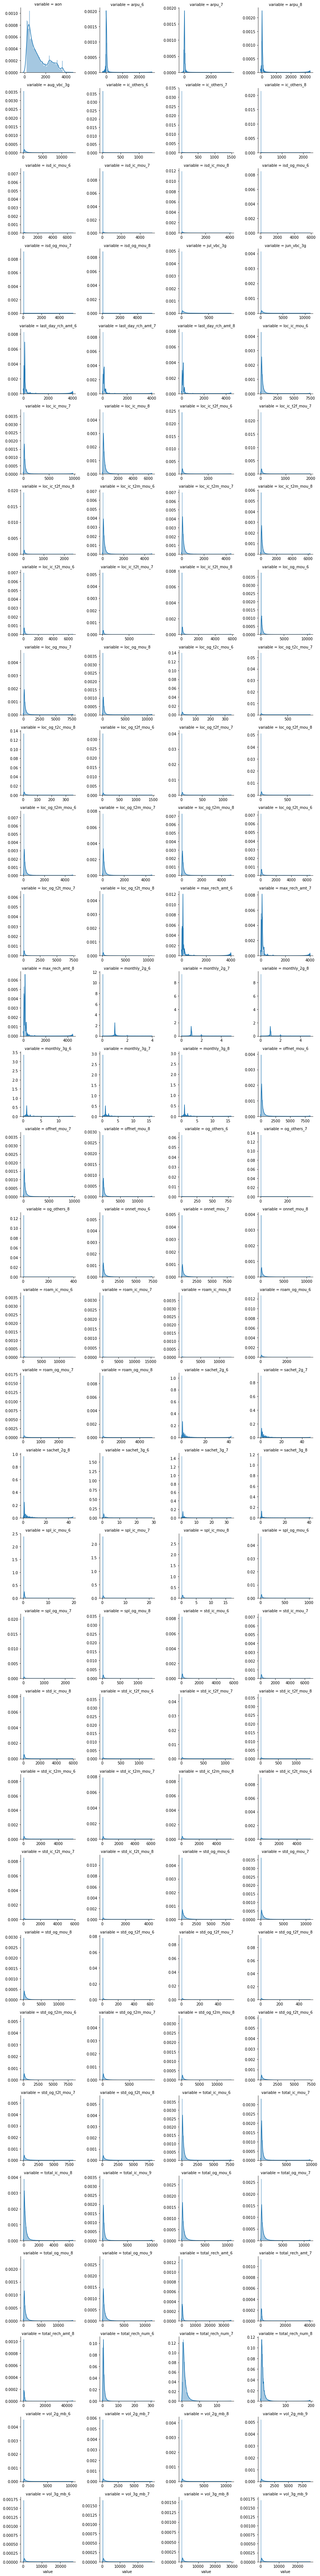

In [32]:
quantitative_features_distribution(cleaned_telecom_df, telecom_numerical_df)

##### Analysing percentile distribution

In [33]:
desc_numerical_data(telecom_numerical_df, True)

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  91185.000000  91185.000000  91185.000000  91185.000000  91185.000000   
mean     290.652299    292.380048    292.717029    131.832446    136.126299   
std      326.189974    343.037618    347.345173    296.212233    311.153061   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      100.434000     98.370000     97.048000      7.610000      7.290000   
50%      204.710000    204.449000    204.505000     34.390000     33.610000   
75%      378.747000    379.881000    382.200000    117.930000    118.560000   
90%      628.768000    634.318200    633.805200    340.914000    354.502000   
95%      840.318000    847.359200    847.810000    609.054000    636.676000   
99%     1410.817320   1451.456560   1471.349200   1432.431200   1494.646000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  91185.000000  91185.000000  91185.000000  91185.000000   91185.000000   
mean     132.538613    197.887877    201.316254    196.470332       9.871512   
std      308.424048    315.195080    329.441286    326.358189      72.584179   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.630000     35.450000     34.380000     32.180000       0.000000   
50%       32.380000     96.910000     95.030000     92.430000       0.000000   
75%      114.980000    231.890000    231.810000    228.130000       0.000000   
90%      342.972000    476.140000    488.598000    484.030000      11.690000   
95%      618.094000    726.404000    752.826000    733.174000      40.726000   
99%     1478.921600   1530.498000   1564.184000   1519.883200     220.064800   
max    10752.560000   8362.360000   9667.130000  14007.340000   13724.380000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   91185.000000   91185.000000   91185.000000   91185.000000   
mean        7.205920       7.335322      13.657573       9.802069   
std        74.640581      69.166267      71.101786      59.161120   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%         4.840000       5.322000      21.502000       8.980000   
95%        23.276000      24.556000      67.354000      42.526000   
99%       156.472800     163.771200     285.280000     221.560000   
max     15371.040000   13095.360000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   91185.000000      91185.000000      91185.000000      91185.000000   
mean        9.941976         48.139802         48.220713         46.950273   
std        65.105128        152.530708        158.648490        153.576277   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.860000          1.980000          1.760000   
50%         0.000000         12.430000         12.510000         12.210000   
75%         0.000000         42.130000         41.830000         41.230000   
90%         8.780000        106.936000        105.252000        104.680000   
95%        41.738000        181.126000        182.080000        180.170000   
99%       222.068000        557.924000        556.542000        542.316000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      91185.000000      91185.000000      91185.000000      91185.000000   
mean          95.020676         94.553591         93.637044          3.844549   
std          163.612014        159.901849        158.191674         14.477565   
min          

##### Analysing impacted rows after outlier treatment using IQR

In [34]:
Q1 = telecom_numerical_df.quantile(0.25)
Q3 = telecom_numerical_df.quantile(0.75)
IQR = Q3 - Q1
cleaned_telecom_iqr_df = telecom_numerical_df[((telecom_numerical_df >= (Q1 - 1.5 * IQR)) & 
                                             (telecom_numerical_df <= (Q3 + 1.5 * IQR))).all(axis=1)]

print('Percentage of rows which will get impacted after outlier treatment using IQR : {}'\
       .format(calculate_percentage(len(cleaned_telecom_df) - len(cleaned_telecom_iqr_df), len(cleaned_telecom_df))))

Percentage of rows which will get impacted after outlier treatment using IQR : 98.83


##### Analysing impacted rows after outlier treatment using 0.01 and 0.99

In [35]:
quantile_001 = telecom_numerical_df.quantile(0.01)
quantile_099 = telecom_numerical_df.quantile(0.99)

cleaned_telecom_99_df = cleaned_telecom_df[((telecom_numerical_df >= quantile_001) & 
                                             (telecom_numerical_df <= quantile_099)).all(axis=1)]

print('Percentage of rows which will get impacted after outlier treatment using 0.01 and 0.99 : {}'\
       .format(calculate_percentage(len(cleaned_telecom_df) - len(cleaned_telecom_99_df), len(cleaned_telecom_df))))

Percentage of rows which will get impacted after outlier treatment using 0.01 and 0.99 : 37.99


<b> Any outlier treatment strategy will impact lot of rows. Outliers are also making sense for independent feature values and  doesn't seem to be added by mistake. Also, decision based algos are robust to outliers. 

https://datascience.stackexchange.com/questions/37394/are-decision-trees-robust-to-outliers

https://www.quora.com/Why-are-tree-based-models-robust-to-outliers

Hence, deciding not to do outlier treatment in this case
</b>


### Standardising Text

#### Extra characters

##### Analysing categorical columns

In [36]:
telecom_categorical_df.describe()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8
count                 90419                90566                89597
unique                   30                   31                   31
top     2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00
freq                  16296                16537                14013
first   2014-06-01 00:00:00  2014-07-01 00:00:00  2014-08-01 00:00:00
last    2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00

##### Fixing extra characters

In [37]:
cleaned_telecom_df['day_of_last_rech_8'] = cleaned_telecom_df['date_of_last_rech_8'].dt.day
cleaned_telecom_df['day_of_last_rech_7'] = cleaned_telecom_df['date_of_last_rech_7'].dt.day
cleaned_telecom_df['day_of_last_rech_6'] = cleaned_telecom_df['date_of_last_rech_6'].dt.day

##### Analysing results

In [38]:
cleaned_telecom_df[['day_of_last_rech_8','date_of_last_rech_8',
           'day_of_last_rech_7','date_of_last_rech_7',
           'day_of_last_rech_6','date_of_last_rech_6']].head(10)

day_of_last_rech_8 date_of_last_rech_8  day_of_last_rech_7  \
1                 28.0          2014-08-28                31.0   
2                 14.0          2014-08-14                24.0   
3                 31.0          2014-08-31                31.0   
4                  9.0          2014-08-09                28.0   
5                 24.0          2014-08-24                17.0   
6                 28.0          2014-08-28                31.0   
7                 26.0          2014-08-26                25.0   
8                 30.0          2014-08-30                31.0   
9                 29.0          2014-08-29                23.0   
11                21.0          2014-08-21                10.0   

   date_of_last_rech_7  day_of_last_rech_6 date_of_last_rech_6  
1           2014-07-31                29.0          2014-06-29  
2           2014-07-24                17.0          2014-06-17  
3           2014-07-31                28.0          2014-06-28  
4           2014-07-28                26.0          2014-06-26  
5           2014-07-17                19.0          2014-06-19  
6           2014-07-31                28.0          2014-06-28  
7           2014-07-25                27.0          2014-06-27  
8           2014-07-31                25.0          2014-06-25  
9           2014-07-23                29.0          2014-06-29  
11          2014-07-10                18.0          2014-06-18

##### Dropping redundant columns

In [39]:
cleaned_telecom_df.drop(['date_of_last_rech_8','date_of_last_rech_7',
                              'date_of_last_rech_6'], axis = 1, inplace = True)

##### Fixing remaining missing values

In [40]:
missing_df = missing_values_analysis(cleaned_telecom_df)

column_name  missing_value_percent
0  day_of_last_rech_8                   1.74
1  day_of_last_rech_6                   0.84
2  day_of_last_rech_7                   0.68

In [41]:
cleaned_telecom_df[['day_of_last_rech_6','day_of_last_rech_7',
            'day_of_last_rech_8']] = cleaned_telecom_df[['day_of_last_rech_6','day_of_last_rech_7',
                                                                      'day_of_last_rech_8']]\
.fillna(0).apply(pd.to_numeric, downcast= 'integer') 

missing_df = missing_values_analysis(cleaned_telecom_df)

Empty DataFrame
Columns: [column_name, missing_value_percent]
Index: []

#### Analysing columns types

In [42]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(cleaned_telecom_df) 

Total Numerical columns : 131
Total Categorical columns : 0


### Filter Data

#### Analysing numerical columns

In [43]:
desc_numerical_data(telecom_numerical_df, True)

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  91185.000000  91185.000000  91185.000000  91185.000000  91185.000000   
mean     290.652299    292.380048    292.717029    131.832446    136.126299   
std      326.189974    343.037618    347.345173    296.212233    311.153061   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      100.434000     98.370000     97.048000      7.610000      7.290000   
50%      204.710000    204.449000    204.505000     34.390000     33.610000   
75%      378.747000    379.881000    382.200000    117.930000    118.560000   
90%      628.768000    634.318200    633.805200    340.914000    354.502000   
95%      840.318000    847.359200    847.810000    609.054000    636.676000   
99%     1410.817320   1451.456560   1471.349200   1432.431200   1494.646000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  91185.000000  91185.000000  91185.000000  91185.000000   91185.000000   
mean     132.538613    197.887877    201.316254    196.470332       9.871512   
std      308.424048    315.195080    329.441286    326.358189      72.584179   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.630000     35.450000     34.380000     32.180000       0.000000   
50%       32.380000     96.910000     95.030000     92.430000       0.000000   
75%      114.980000    231.890000    231.810000    228.130000       0.000000   
90%      342.972000    476.140000    488.598000    484.030000      11.690000   
95%      618.094000    726.404000    752.826000    733.174000      40.726000   
99%     1478.921600   1530.498000   1564.184000   1519.883200     220.064800   
max    10752.560000   8362.360000   9667.130000  14007.340000   13724.380000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   91185.000000   91185.000000   91185.000000   91185.000000   
mean        7.205920       7.335322      13.657573       9.802069   
std        74.640581      69.166267      71.101786      59.161120   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%         4.840000       5.322000      21.502000       8.980000   
95%        23.276000      24.556000      67.354000      42.526000   
99%       156.472800     163.771200     285.280000     221.560000   
max     15371.040000   13095.360000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   91185.000000      91185.000000      91185.000000      91185.000000   
mean        9.941976         48.139802         48.220713         46.950273   
std        65.105128        152.530708        158.648490        153.576277   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.860000          1.980000          1.760000   
50%         0.000000         12.430000         12.510000         12.210000   
75%         0.000000         42.130000         41.830000         41.230000   
90%         8.780000        106.936000        105.252000        104.680000   
95%        41.738000        181.126000        182.080000        180.170000   
99%       222.068000        557.924000        556.542000        542.316000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      91185.000000      91185.000000      91185.000000      91185.000000   
mean          95.020676         94.553591         93.637044          3.844549   
std          163.612014        159.901849        158.191674         14.477565   
min          


#### Columns not relevent for analysis

##### Analysing variance for numerical columns

In [44]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    variance_df = pd.DataFrame(round(telecom_numerical_df.var(), 2))
    zero_value_pct_df = cleaned_telecom_df[list(variance_df.index)].apply(lambda x: x == 0)\
    .apply(lambda x: x.astype('category')).apply(pd.Series.value_counts, normalize = True) * 100
    variance_df['no_of_zero_values_pct'] = zero_value_pct_df.loc[True]
    variance_df.reset_index(inplace = True)
    variance_df.rename(columns = {'index': 'column_name', 0: 'variance'}, inplace = True)
    variance_df = variance_df.sort_values(by=['variance','no_of_zero_values_pct'], ascending = False)
    display(variance_df)

column_name   variance  no_of_zero_values_pct
124                 aon  932579.44                    NaN
111         vol_3g_mb_9  313942.56              84.189286
110         vol_3g_mb_8  299764.29              83.684817
109         vol_3g_mb_7  281437.04              84.326369
108         vol_3g_mb_6  254614.18              85.440588
52       total_og_mou_7  239846.46               5.544772
53       total_og_mou_8  235388.42               6.074464
54       total_og_mou_9  223989.39               9.390799
51       total_og_mou_6  218055.57               6.024017
97     total_rech_amt_8  176655.70               9.413829
96     total_rech_amt_7  171387.16               8.363218
40         std_og_mou_7  169922.28              31.443768
41         std_og_mou_8  167030.10              32.226792
95     total_rech_amt_6  158008.37               8.416955
39         std_og_mou_6  149506.87              30.585074
2                arpu_8  120648.67               1.715194
1                arpu_7  117674.81               1.268849
7          offnet_mou_7  108531.56               3.593793
8          offnet_mou_8  106509.67               4.243022
0                arpu_6  106399.90               1.464057
6          offnet_mou_6   99347.94               3.651916
4           onnet_mou_7   96816.23               8.855623
5           onnet_mou_8   95125.39               9.644130
80       total_ic_mou_7   92165.59               3.659593
3           onnet_mou_6   87741.69               8.868783
81       total_ic_mou_8   86268.96               3.938148
79       total_ic_mou_6   86113.20               4.340626
82       total_ic_mou_9   83784.63               6.656797
126          jul_vbc_3g   76635.69              83.492899
34     std_og_t2m_mou_7   74147.29              38.987772
125          aug_vbc_3g   73952.25              82.661622
35     std_og_t2m_mou_8   72570.63              40.064704
31     std_og_t2t_mou_7   70029.22              54.643856
32     std_og_t2t_mou_8   69371.69              55.559577
65         loc_ic_mou_7   66610.98               4.133355
127          jun_vbc_3g   65752.60              84.694851
27         loc_og_mou_6   64458.95               8.051763
64         loc_ic_mou_6   64249.17               4.945989
28         loc_og_mou_7   63987.54               7.427757
33     std_og_t2m_mou_6   63944.42              38.362669
30     std_og_t2t_mou_6   62775.84              54.775456
66         loc_ic_mou_8   62530.03               4.443713
29         loc_og_mou_8   61939.81               8.234907
105         vol_2g_mb_7   47081.30              76.685858
104         vol_2g_mb_6   46941.63              77.286834
106         vol_2g_mb_8   46871.20              76.228546
107         vol_2g_mb_9   40848.75              77.344958
59     loc_ic_t2m_mou_7   29543.57               4.975599
60     loc_ic_t2m_mou_8   29382.48               5.341887
58     loc_ic_t2m_mou_6   29343.34               5.999890
18     loc_og_t2m_mou_6   26768.89               9.226298
19     loc_og_t2m_mou_7   25568.60               8.464111
16     loc_og_t2t_mou_7   25169.34              15.106651
20     loc_og_t2m_mou_8   25024.61               9.299775
17     loc_og_t2t_mou_8   23585.67              15.948895
15     loc_og_t2t_mou_6   23265.62              15.978505
56     loc_ic_t2t_mou_7   21173.78              10.813182
55     loc_ic_t2t_mou_6   19732.12              12.125898
57     loc_ic_t2t_mou_8   18095.99              11.438285
100      max_rech_amt_8   15719.35               9.413829
99       max_rech_amt_7   14972.79               8.363218
98       max_rech_amt_6   14278.36               8.416955
77         std_ic_mou_7   13364.18              24.545704
78         std_ic_mou_8   12247.96              24.694851
76         std_ic_mou_6   11154.42              24.838515
103  last_day_rch_amt_8   10857.99              30.056479
101  last_day_rch_amt_6    9304.03              24.099358
102  last_day_rch_amt_7    9138.89              29.158305
71     std

#### Identifying columns with variance < 10 

In [45]:
low_variance_columns = list(variance_df[variance_df['variance'] < 10]['column_name'])
print(low_variance_columns)

['og_others_8', 'og_others_7', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_6', 'sachet_3g_8', 'sachet_3g_7', 'sachet_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_6', 'monthly_2g_7', 'monthly_2g_6', 'monthly_2g_8', 'spl_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_8']


#### Dropping low variance columns

In [46]:
cleaned_telecom_df.drop(low_variance_columns, axis = 1, inplace = True)

##### Analysing columns types

In [47]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(cleaned_telecom_df) 

Total Numerical columns : 114
Total Categorical columns : 0


##### Finding corelation between numeric data

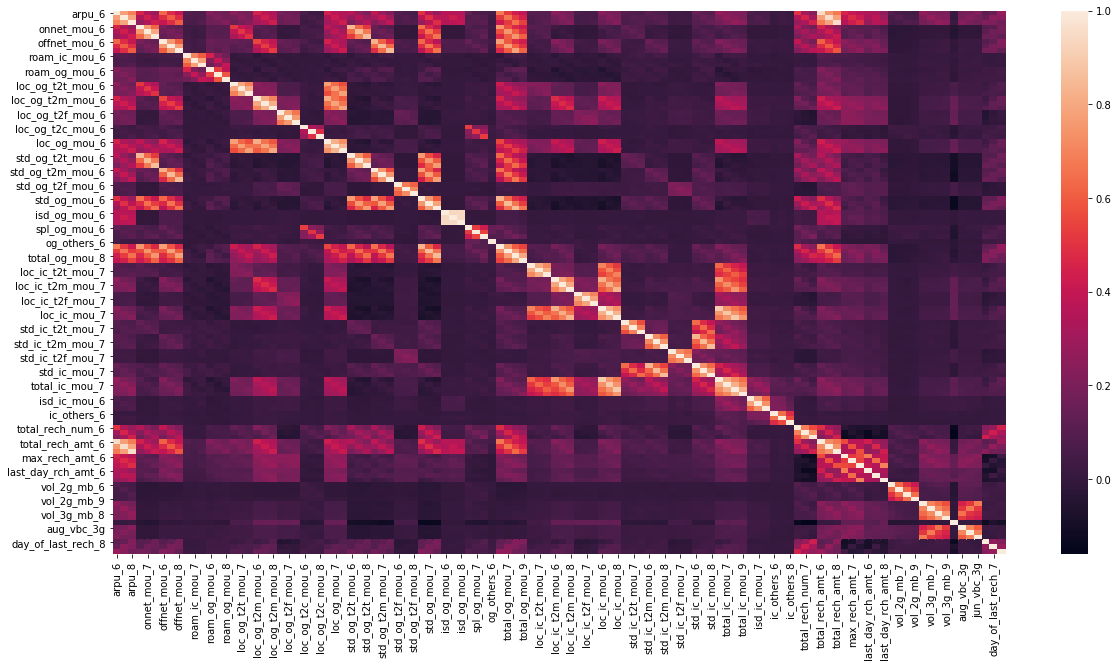

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom_numerical_df.corr())
plt.show()

##### Finding correlated columns

In [49]:
# Create correlation matrix
corr_matrix = cleaned_telecom_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
corr_columns = [column for column in upper.columns if any(upper[column] > 0.9)]
print('Corelated columns : \n {}'.format(corr_columns))

Corelated columns : 
 ['isd_og_mou_7', 'isd_og_mou_8', 'total_ic_mou_6', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


##### Calculating average amount for good phase

In [50]:
av_rech_amt_good_phase =  ((cleaned_telecom_df['total_rech_amt_6'] + cleaned_telecom_df['total_rech_amt_7'])/ 2)

##### Dropping corelated columns

In [51]:
cleaned_telecom_df.drop(corr_columns, axis = 1, inplace = True)

##### Analysing columns types

In [52]:
telecom_numerical_df, telecom_categorical_df = column_type_analysis(cleaned_telecom_df) 

Total Numerical columns : 108
Total Categorical columns : 0


#### Finding corelation between numeric data

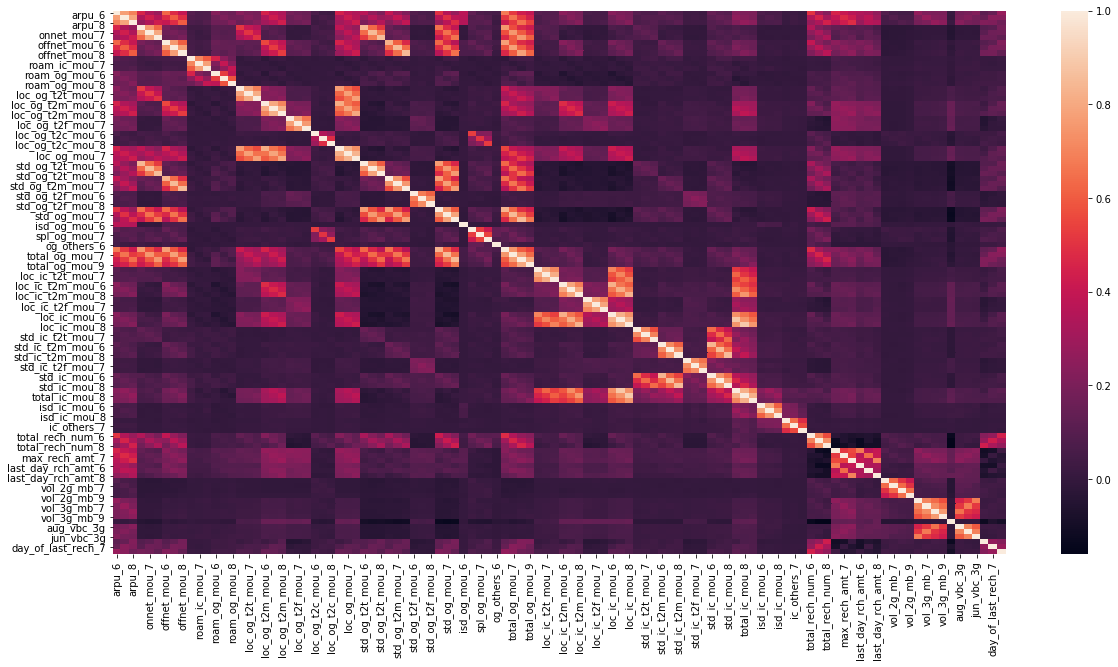

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom_numerical_df.corr())
plt.show()

#### Extra/Unnecessary  rows

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(telecom_numerical_df.loc[: , telecom_numerical_df.columns.str.contains('rech')].describe())

total_rech_num_6  total_rech_num_7  total_rech_num_8  max_rech_amt_6  \
count      91185.000000      91185.000000      91185.000000    91185.000000   
mean           7.750683          8.010956          7.494621      107.102144   
std            7.052659          7.158477          7.242205      119.492089   
min            0.000000          0.000000          0.000000        0.000000   
25%            4.000000          4.000000          3.000000       36.000000   
50%            6.000000          6.000000          5.000000      110.000000   
75%           10.000000         10.000000          9.000000      120.000000   
max          307.000000        138.000000        196.000000     4010.000000   

       max_rech_amt_7  max_rech_amt_8  day_of_last_rech_8  day_of_last_rech_7  \
count    91185.000000    91185.000000        91185.000000        91185.000000   
mean       108.264353      112.136908           25.128464           25.593234   
std        122.363347      125.376821            6.811973            5.854321   
min          0.000000        0.000000            0.000000            0.000000   
25%         30.000000       30.000000           24.000000           23.000000   
50%        110.000000      110.000000           27.000000           27.000000   
75%        128.000000      145.000000           30.000000           30.000000   
max       4010.000000     4449.000000           31.000000           31.000000   

       day_of_last_rech_6  
count        91185.000000  
mean            24.186599  
std              6.322139  
min              0.000000  
25%             21.000000  
50%             27.000000  
75%             29.000000  
max             30.000000

##### Filtering high value customers after cleaning

In [55]:
high_value_customer_threshold = av_rech_amt_good_phase.quantile(0.7)

print('High Customer Value Threshold : {}'.format(high_value_customer_threshold))

high_value_customer_df = cleaned_telecom_df[ 
              (av_rech_amt_good_phase >= high_value_customer_threshold)].copy()

print('After cleaning, number of High Value Customers : {}'.format(len(high_value_customer_df.index)))

High Customer Value Threshold : 382.5
After cleaning, number of High Value Customers : 27360


##### Re-analysing impacted rows after outlier treatment using IQR for high-value customers

In [56]:
Q1 = high_value_customer_df.quantile(0.25)
Q3 = high_value_customer_df.quantile(0.75)
IQR = Q3 - Q1
high_value_customer_iqr_df = high_value_customer_df[((high_value_customer_df >= (Q1 - 1.5 * IQR)) & 
                                             (high_value_customer_df <= (Q3 + 1.5 * IQR))).all(axis=1)]

print('Percentage of rows which will get impacted after outlier treatment using IQR : {}'\
       .format(calculate_percentage(len(high_value_customer_df) - len(high_value_customer_iqr_df), 
                                    len(high_value_customer_df))))

Percentage of rows which will get impacted after outlier treatment using IQR : 99.51


##### Re-analysing impacted rows after outlier treatment using 0.01 and 0.99 for high-value customers

In [57]:
quantile_001 = high_value_customer_df.quantile(0.01)
quantile_099 = high_value_customer_df.quantile(0.99)

high_value_customer_99_df = high_value_customer_df[((high_value_customer_df >= quantile_001) & 
                                             (high_value_customer_df <= quantile_099)).all(axis=1)]

print('Percentage of rows which will get impacted after outlier treatment using 0.01 and 0.99 : {}'\
       .format(calculate_percentage(len(high_value_customer_df) - len(high_value_customer_99_df), 
                                    len(high_value_customer_df))))

Percentage of rows which will get impacted after outlier treatment using 0.01 and 0.99 : 37.46


<b> Since, the outier treatment results are almost identical, choosing not to do any outlier treatment due to the reason as stated above.</b>

### Derive target variable

#### Analysing churn phase usage

In [58]:
high_value_customer_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].describe()

total_ic_mou_9  total_og_mou_9   vol_2g_mb_9   vol_3g_mb_9
count    27360.000000    27360.000000  27360.000000  27360.000000
mean       291.280994      594.536639     63.734012    275.741802
std        363.318473      663.621512    247.026756    865.846927
min          0.000000        0.000000      0.000000      0.000000
25%         74.382500      167.237500      0.000000      0.000000
50%        188.165000      413.885000      0.000000      0.000000
75%        376.162500      797.182500      8.050000      0.000000
max       7785.730000    11140.110000   8993.950000  26857.040000

#### Deriving churn value based on churn phase usage

In [59]:
churn_tagged_df = high_value_customer_df.copy()

total_usage = high_value_customer_df['total_og_mou_9'] + \
high_value_customer_df['total_ic_mou_9'] + high_value_customer_df['vol_2g_mb_9'] + high_value_customer_df['vol_3g_mb_9']


churn_tagged_df.loc[:,'churn'] = np.where(total_usage == 0, 1,0)

print('Percentage of churn records : {}'.format(calculate_percentage(churn_tagged_df['churn'].sum(), 
                                                                     len(churn_tagged_df.index))))

Percentage of churn records : 6.25


#### Removing remaining churn phase columns

In [60]:
churn_month_remaining_columns = churn_tagged_df.loc[:, churn_tagged_df.columns.str.contains('_9')].columns
churn_month_remaining_columns

final_df = churn_tagged_df.drop(churn_month_remaining_columns, axis = 1)

#### Analyse column types

In [61]:
final_numerical_df, final_cateforical_df = column_type_analysis(final_df) 

Total Numerical columns : 105
Total Categorical columns : 0


#### Creating churn and non-churn dataframes

In [62]:
telecom_churn_df = final_df[final_df['churn'] == 1].copy()
telecom_non_churn_df = final_df[final_df['churn'] == 0].copy()

## Step 3 - Data Visualization

#### Univariate Analysis

##### Quantative Variables

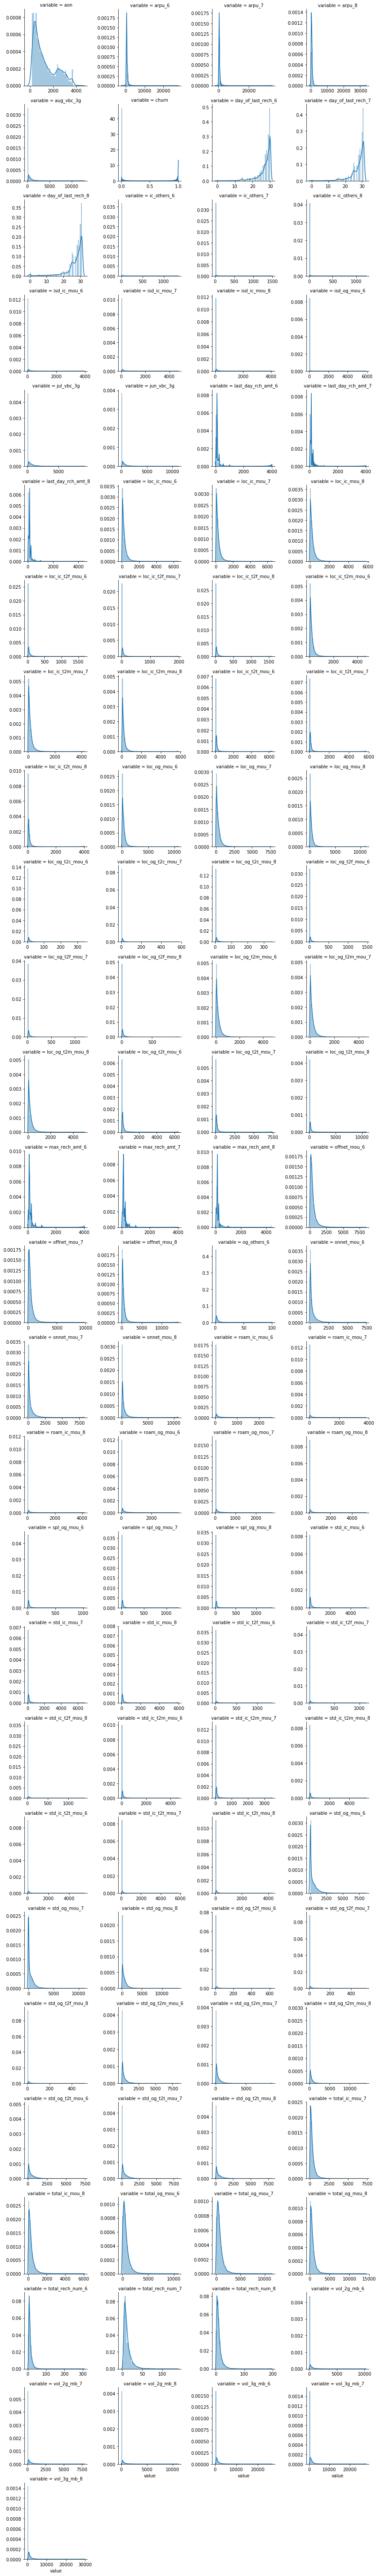

In [63]:
quantitative_features_distribution(final_df, final_numerical_df)

##### Churn

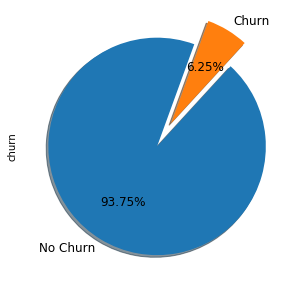

In [64]:
plt.figure(figsize = (10,5))
labels ="No Churn", "Churn"

final_df["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, fontsize=12, startangle=70)
plt.show()

<b> Inference - Some class imbalance handling technique has to be taken into account </b>

##### Day of last recharge - June 

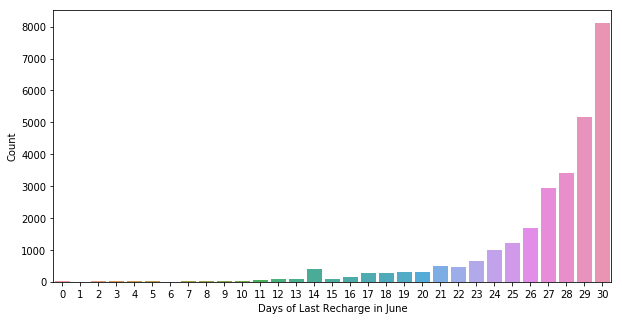

In [65]:
plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_6", data=final_df)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Count')
plt.show()

##### Day of last recharge - July

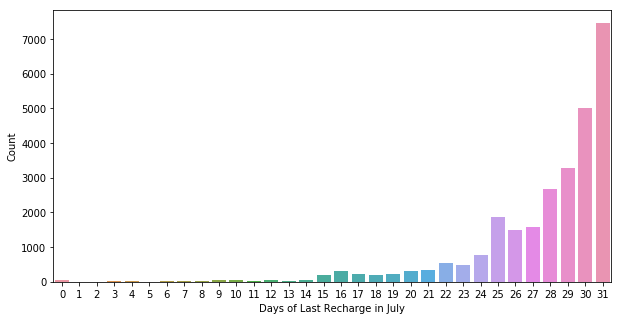

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_7", data=final_df)
plt.xlabel('Days of Last Recharge in July')
plt.ylabel('Count')
plt.show()

##### Day of last recharge - August

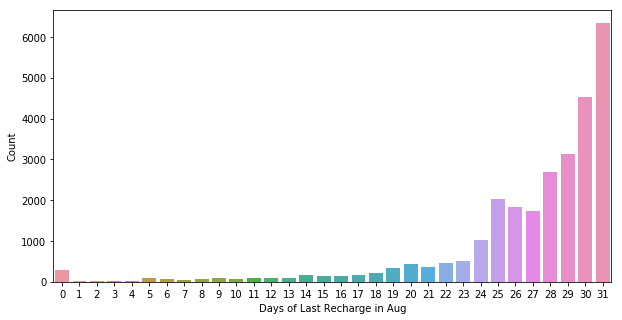

In [67]:
plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_8", data=final_df)
plt.xlabel('Days of Last Recharge in Aug')
plt.ylabel('Count')
plt.show()

#### Bivariate Analysis

##### Quantative Variables with Churn

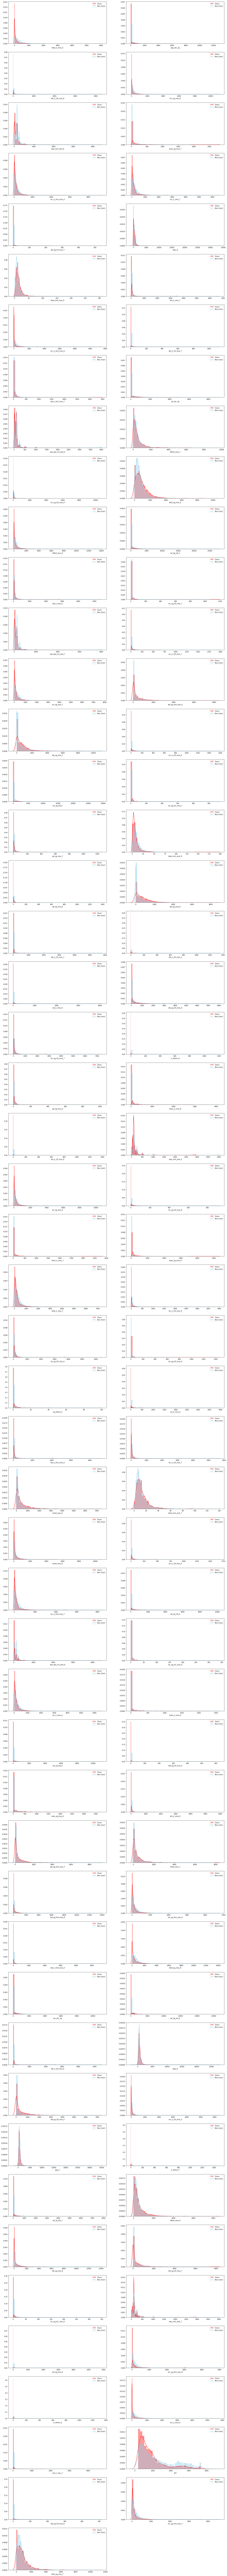

In [68]:
subplots_values = list(set(final_df.columns).difference(('churn', 'day_of_last_rech_6', 'day_of_last_rech_7', 
                                                     'day_of_last_rech_8')))

total_subplot_values = len(subplots_values)
subplot_rows = math.ceil(total_subplot_values /2)

fig = plt.figure(figsize = (25, subplot_rows * 6))

for index, param_value in enumerate(subplots_values):
    fig.add_subplot(subplot_rows, 2, (index + 1))
    sns.distplot( telecom_churn_df[param_value] , color="red", label="Churn")
    sns.distplot( telecom_non_churn_df[param_value] , color="skyblue", label="Non-churn")
    plt.legend()

plt.show()

<b>Quantative variables</b> doesn't seem to have any distinct patterns for <b>Churn vs Non-Churn</b> customers

##### Days of Last Recharge - June with Churn

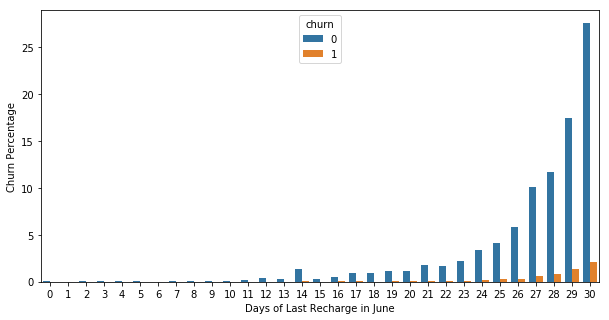

In [69]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_6", y="churn", hue="churn", data=final_df,
            estimator=lambda x: len(x) / len(final_df) * 100)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Churn Percentage')
plt.show()

<b>day_of_last_rech_6 </b>doesn't seem to have any significant relation with churn and non-churn customers

##### Days of Last Recharge - July with Churn

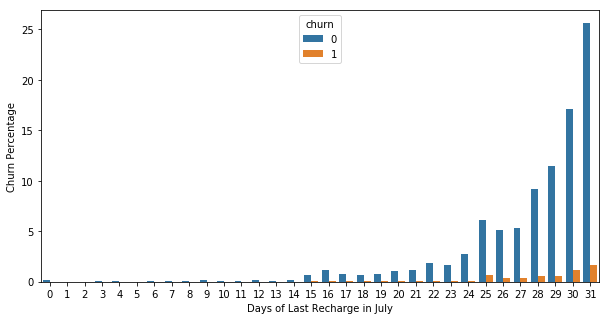

In [70]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_7", y="churn", hue="churn", data=final_df,
            estimator=lambda x: len(x) / len(final_df) * 100)
plt.xlabel('Days of Last Recharge in July')
plt.ylabel('Churn Percentage')
plt.show()

<b>day_of_last_rech_7 </b>doesn't seem to have any significant relation with churn and non-churn customers

##### Days of Last Recharge - August with Churn

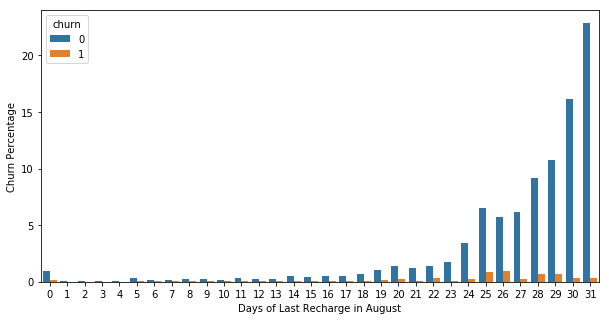

In [71]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_8", y="churn", hue="churn", data=final_df,
            estimator=lambda x: len(x) / len(final_df) * 100)
plt.xlabel('Days of Last Recharge in August')
plt.ylabel('Churn Percentage')
plt.show()

<b>day_of_last_rech_8 </b>doesn't seem to have any significant relation with churn and non-churn customers

## Step 4 - Data Preparation

### Dividing Training data into X and Y sets for model building

In [72]:
X = final_df.drop('churn', axis = 1)
X = X.swifter.apply(lambda x: x.astype(float))
y = final_df['churn']

### Listing all features

In [73]:
# Putting features
features = list(X.columns)
print('Total features : {}'.format(len(features)))

Total features : 104


### Splitting data into Training and Testing Sets

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = RANDOM_STATE)

print('Shape of training data : {}'.format(X_train.shape))
print('Percentage of churn rows in training data : {}'
      .format(calculate_percentage(len(y_train[y_train == 1]),len(y_train))))
print('Percentage of non-churn rows in training data : {}'
      .format(calculate_percentage(len(y_train[y_train == 0]),len(y_train))))
print('\n')
print('Shape of test data : {}'.format(X_test.shape))
print('Percentage of churn rows in test data : {}'
      .format(calculate_percentage(len(y_test[y_test == 1]),len(y_test))))
print('Percentage of non-churn rows in test data : {}'
      .format(calculate_percentage(len(y_test[y_test == 0]),len(y_test))))

Shape of training data : (19152, 104)
Percentage of churn rows in training data : 6.22
Percentage of non-churn rows in training data : 93.78


Shape of test data : (8208, 104)
Percentage of churn rows in test data : 6.34
Percentage of non-churn rows in test data : 93.66


In [75]:
X_train_oversampled, y_train_oversampled = oversample_minor_class(X_train, y_train)
X_train_downsampled, y_train_downsampled = downsample_major_class(X_train, y_train)
X_train_smote, y_train_smote = perform_smote(X_train, y_train)

After upsampling, number of values per class in training data : 
 1    17961
0    17961
Name: churn, dtype: int64 

After downsampling, number of values per class in training data : 
 1    1191
0    1191
Name: churn, dtype: int64 

After SMOTE, number of values per class in training data : 
 1    17961
0    17961
dtype: int64 



## Step 5 - Model Preparation

### Initialising PCA

In [76]:
default_incremental_pca = IncrementalPCA()

### Logistic Regression

#### Default data

#### Without PCA

False Positive Rate : [0.         0.00936524 1.        ]
True Positive Rate : [0.    0.125 1.   ]
Thresholds : [2 1 0]
ROC AUC Score : 0.5578173777315297
Accuracy Score : 0.9357943469785575
Precision Score : 0.4744525547445255
Recall Score : 0.125
F1 Score : 0.197869101978691
Confusion Matrix : 
 [[7616   72]
 [ 455   65]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      7688
           1       0.47      0.12      0.20       520

    accuracy                           0.94      8208
   macro avg       0.71      0.56      0.58      8208
weighted avg       0.91      0.94      0.92      8208



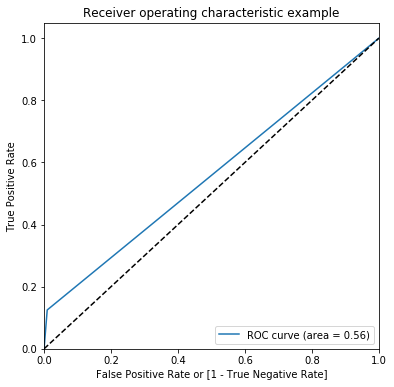

In [77]:
log_reg_default_model = LogisticRegression()
log_reg_default_model.fit(X_train, y_train)

y_pred_log_reg_default = log_reg_default_model.predict(X_test)

analyse_model(y_test, y_pred_log_reg_default)

##### With PCA

False Positive Rate : [0.         0.00897503 1.        ]
True Positive Rate : [0.         0.11538462 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.5532047946850237
Accuracy Score : 0.9355506822612085
Precision Score : 0.46511627906976744
Recall Score : 0.11538461538461539
F1 Score : 0.1848998459167951
Confusion Matrix : 
 [[7619   69]
 [ 460   60]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      7688
           1       0.47      0.12      0.18       520

    accuracy                           0.94      8208
   macro avg       0.70      0.55      0.58      8208
weighted avg       0.91      0.94      0.92      8208



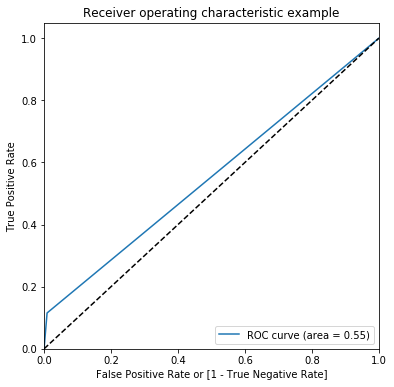

In [78]:
log_reg_default_pca, X_train_log_reg_default_pca, X_test_log_reg_default_pca = perform_pca(X_train, X_test)

log_reg_default_pca_model = LogisticRegression()
log_reg_default_pca_model.fit(X_train_log_reg_default_pca, y_train)

y_pred_log_reg_pca_default = log_reg_default_pca_model.predict(X_test_log_reg_default_pca)

analyse_model(y_test, y_pred_log_reg_pca_default)

#### Downsampled majority training data

##### Without PCA

False Positive Rate : [0.         0.21878252 1.        ]
True Positive Rate : [0.    0.825 1.   ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8031087408949011
Accuracy Score : 0.7839912280701754
Precision Score : 0.20322122216958788
Recall Score : 0.825
F1 Score : 0.3261117445838084
Confusion Matrix : 
 [[6006 1682]
 [  91  429]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      7688
           1       0.20      0.82      0.33       520

    accuracy                           0.78      8208
   macro avg       0.59      0.80      0.60      8208
weighted avg       0.94      0.78      0.84      8208



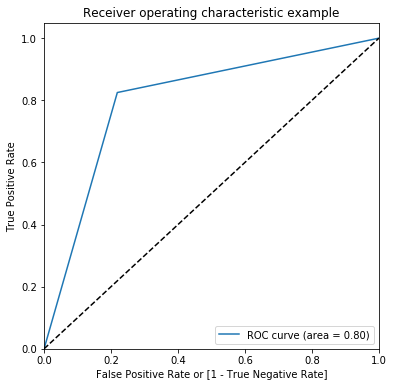

In [79]:
log_reg_downsampled_default_model = LogisticRegression()
log_reg_downsampled_default_model.fit(X_train_downsampled, y_train_downsampled)

y_pred_log_reg_downsampled_default = log_reg_downsampled_default_model.predict(X_test)

analyse_model(y_test, y_pred_log_reg_downsampled_default)

##### With PCA

False Positive Rate : [0.         0.21514048 1.        ]
True Positive Rate : [0.         0.83076923 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8078143760505885
Accuracy Score : 0.7877680311890838
Precision Score : 0.20709491850431447
Recall Score : 0.8307692307692308
F1 Score : 0.33154259401381425
Confusion Matrix : 
 [[6034 1654]
 [  88  432]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      7688
           1       0.21      0.83      0.33       520

    accuracy                           0.79      8208
   macro avg       0.60      0.81      0.60      8208
weighted avg       0.94      0.79      0.84      8208



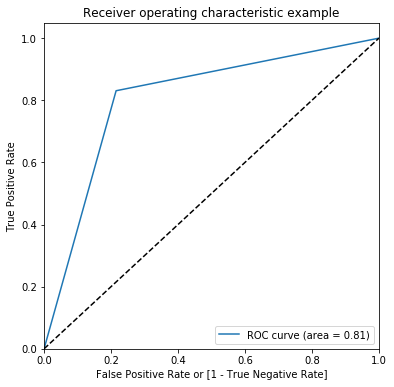

In [80]:
log_reg_downsampled_default_pca,\
X_train_log_reg_downsampled_default_pca, X_test_log_reg_downsampled_default_pca = perform_pca(X_train_downsampled, X_test)

log_reg_downsampled_default_pca_model = LogisticRegression()
log_reg_downsampled_default_pca_model.fit(X_train_log_reg_downsampled_default_pca, y_train_downsampled)

y_pred_log_reg_downsampled_default_pca = log_reg_downsampled_default_pca_model\
.predict(X_test_log_reg_downsampled_default_pca)

analyse_model(y_test, y_pred_log_reg_downsampled_default_pca)

#### Oversampled minority training data

##### Without PCA

False Positive Rate : [0.         0.20291363 1.        ]
True Positive Rate : [0.         0.82692308 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.812004722644681
Accuracy Score : 0.7989766081871345
Precision Score : 0.21608040201005024
Recall Score : 0.8269230769230769
F1 Score : 0.3426294820717131
Confusion Matrix : 
 [[6128 1560]
 [  90  430]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      7688
           1       0.22      0.83      0.34       520

    accuracy                           0.80      8208
   macro avg       0.60      0.81      0.61      8208
weighted avg       0.94      0.80      0.85      8208



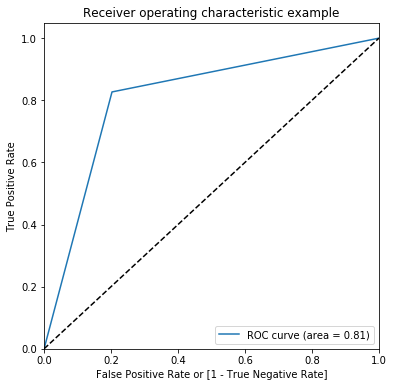

In [81]:
log_reg_oversampled_default_model = LogisticRegression()
log_reg_oversampled_default_model.fit(X_train_oversampled, y_train_oversampled)

y_pred_log_reg_oversampled_default = log_reg_oversampled_default_model.predict(X_test)

analyse_model(y_test, y_pred_log_reg_oversampled_default)

##### With PCA

False Positive Rate : [0.         0.20096254 1.        ]
True Positive Rate : [0.         0.83076923 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8149033458736894
Accuracy Score : 0.8010477582846004
Precision Score : 0.21851289833080426
Recall Score : 0.8307692307692308
F1 Score : 0.3460152182619143
Confusion Matrix : 
 [[6143 1545]
 [  88  432]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      7688
           1       0.22      0.83      0.35       520

    accuracy                           0.80      8208
   macro avg       0.60      0.81      0.61      8208
weighted avg       0.94      0.80      0.85      8208



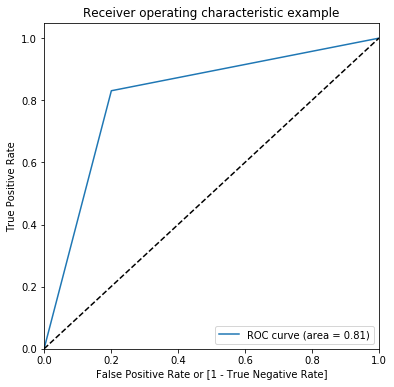

In [82]:
log_reg_oversampled_default_pca,\
X_train_log_reg_oversampled_default_pca, X_test_log_reg_oversampled_default_pca = perform_pca(X_train_oversampled, X_test)

log_reg_oversampled_default_pca_model = LogisticRegression()
log_reg_oversampled_default_pca_model.fit(X_train_log_reg_oversampled_default_pca, y_train_oversampled)

y_pred_log_reg_oversampled_default_pca = log_reg_oversampled_default_pca_model\
.predict(X_test_log_reg_oversampled_default_pca)

analyse_model(y_test, y_pred_log_reg_oversampled_default_pca)

#### SMOTE training data

##### Without PCA

False Positive Rate : [0.        0.2016129 1.       ]
True Positive Rate : [0.         0.80961538 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8040012406947891
Accuracy Score : 0.7990984405458089
Precision Score : 0.21359715880263824
Recall Score : 0.8096153846153846
F1 Score : 0.33801686069851467
Confusion Matrix : 
 [[6138 1550]
 [  99  421]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      7688
           1       0.21      0.81      0.34       520

    accuracy                           0.80      8208
   macro avg       0.60      0.80      0.61      8208
weighted avg       0.94      0.80      0.85      8208



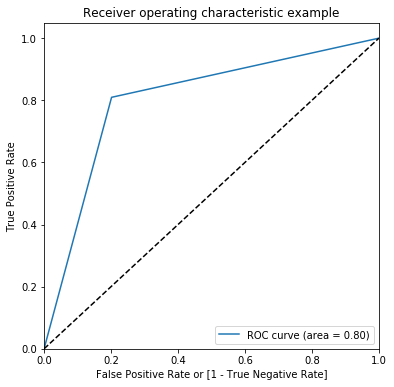

In [83]:
log_reg_smote_default_model = LogisticRegression()
log_reg_smote_default_model.fit(X_train_smote, y_train_smote)

y_pred_log_reg_smote_default = log_reg_smote_default_model.predict(X_test)

analyse_model(y_test, y_pred_log_reg_smote_default)

##### With PCA

False Positive Rate : [0.         0.19979188 1.        ]
True Positive Rate : [0.         0.81153846 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8058732890418635
Accuracy Score : 0.8009259259259259
Precision Score : 0.21552604698672115
Recall Score : 0.8115384615384615
F1 Score : 0.3405972558514932
Confusion Matrix : 
 [[6152 1536]
 [  98  422]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      7688
           1       0.22      0.81      0.34       520

    accuracy                           0.80      8208
   macro avg       0.60      0.81      0.61      8208
weighted avg       0.94      0.80      0.85      8208



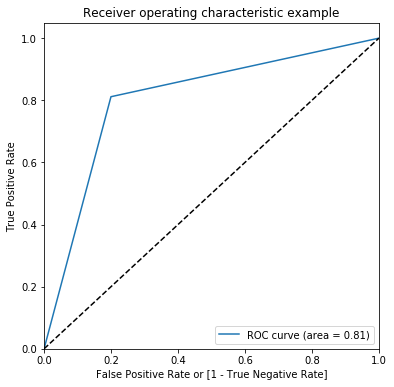

In [84]:
log_reg_smote_default_pca,\
X_train_log_reg_smote_default_pca, X_test_log_reg_smote_default_pca = perform_pca(X_train_smote, X_test)

log_reg_smote_default_pca_model = LogisticRegression()
log_reg_smote_default_pca_model.fit(X_train_log_reg_smote_default_pca, y_train_smote)

y_pred_log_reg_smote_default_pca = log_reg_smote_default_pca_model.predict(X_test_log_reg_smote_default_pca)

analyse_model(y_test, y_pred_log_reg_smote_default_pca)

<b>Overall all class imbalance handling techniques providing similar results, hence using Downsampling major class with PCA for hyperparameter tuning for performance gains</b>

#### Plotting PCA

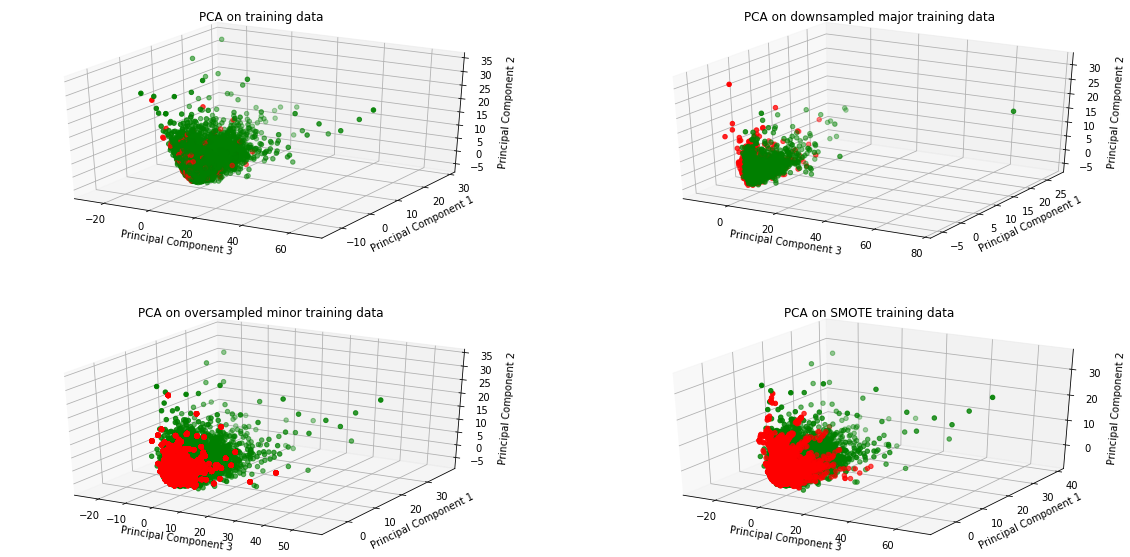

In [85]:
fig = plt.figure(figsize=(20,10))
pca_ax1 = fig.add_subplot(2, 2, 1, projection='3d')
plot_pca(pca_ax1, X_train_log_reg_default_pca, y_train,'PCA on training data')

pca_ax2 = fig.add_subplot(2, 2, 2, projection='3d')
plot_pca(pca_ax2, X_train_log_reg_downsampled_default_pca, y_train_downsampled, 'PCA on downsampled major training data')

pca_ax3 = fig.add_subplot(2, 2, 3, projection='3d')
plot_pca(pca_ax3, X_train_log_reg_oversampled_default_pca, y_train_oversampled, 'PCA on oversampled minor training data')

pca_ax4 = fig.add_subplot(2, 2, 4, projection='3d')
plot_pca(pca_ax4, X_train_log_reg_smote_default_pca, y_train_smote, 'PCA on SMOTE training data')

plt.show()

#### Scree Plots

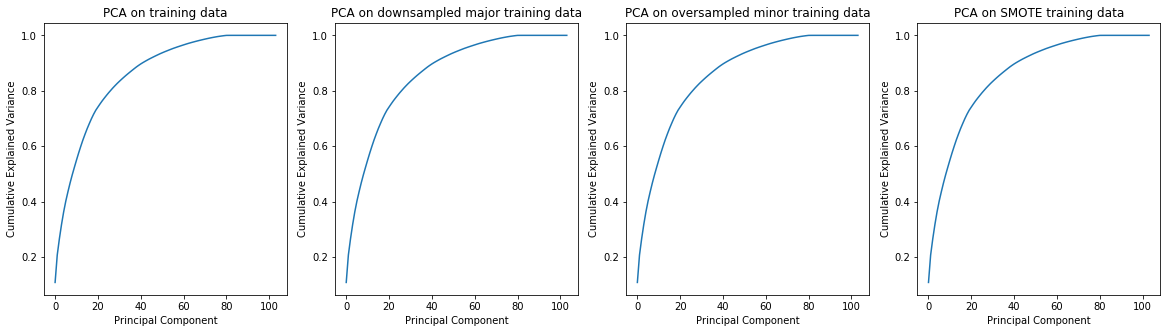

In [86]:
fig = plt.figure(figsize = (20,5))

pca_subplot1 = fig.add_subplot(141)
plot_cum_explained_variance(pca_subplot1, 'PCA on training data', log_reg_default_pca)

pca_subplot2 = fig.add_subplot(142)
plot_cum_explained_variance(pca_subplot2, 'PCA on downsampled major training data', log_reg_downsampled_default_pca)

pca_subplot3 = fig.add_subplot(143)
plot_cum_explained_variance(pca_subplot3, 'PCA on oversampled minor training data', log_reg_oversampled_default_pca)

pca_subplot4 = fig.add_subplot(144)
plot_cum_explained_variance(pca_subplot4, 'PCA on SMOTE training data', log_reg_smote_default_pca)

plt.show()

#### Cross-checking Cumulative Explained Variance for Principal Components

In [87]:
explained_variance_df = pd.DataFrame(np.cumsum(log_reg_default_pca.explained_variance_ratio_), 
                                     columns = ['default_cev'])
explained_variance_df['downsampled_cev'] = np\
.cumsum(log_reg_downsampled_default_pca.explained_variance_ratio_)
explained_variance_df['oversampled_cev'] = np\
.cumsum(log_reg_oversampled_default_pca.explained_variance_ratio_)
explained_variance_df['smote_cev'] = np.cumsum(log_reg_smote_default_pca.explained_variance_ratio_)
explained_variance_df.index = np.arange(1, len(explained_variance_df) + 1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(explained_variance_df)

default_cev  downsampled_cev  oversampled_cev  smote_cev
1       0.108747         0.111989         0.111522   0.117702
2       0.207683         0.202222         0.201473   0.210285
3       0.266340         0.261801         0.257357   0.266645
4       0.317878         0.318477         0.308406   0.317331
5       0.363440         0.363757         0.352859   0.362887
6       0.402390         0.402350         0.390063   0.400904
7       0.436001         0.436695         0.423118   0.435027
8       0.467672         0.468384         0.455631   0.467199
9       0.496848         0.499687         0.485775   0.497885
10      0.523922         0.529048         0.513844   0.526400
11      0.550403         0.556906         0.539443   0.552477
12      0.575911         0.581848         0.564618   0.578070
13      0.600047         0.606773         0.588348   0.601937
14      0.623012         0.629897         0.610199   0.623772
15      0.643948         0.649470         0.630145   0.643948
16      0.663962         0.666827         0.649390   0.663357
17      0.682215         0.682216         0.666493   0.680656
18      0.699839         0.697421         0.682659   0.697181
19      0.715771         0.711053         0.698284   0.712370
20      0.729957         0.722718         0.713542   0.727098
21      0.741533         0.734091         0.727050   0.740684
22      0.752878         0.745105         0.738169   0.751374
23      0.763760         0.755894         0.749171   0.761619
24      0.773819         0.766154         0.759748   0.771795
25      0.783533         0.776152         0.770000   0.781663
26      0.792949         0.785956         0.780031   0.790839
27      0.801784         0.795160         0.789566   0.799796
28      0.810555         0.803907         0.798493   0.808435
29      0.818687         0.812218         0.807041   0.816582
30      0.826608         0.820396         0.815474   0.824522
31      0.834001         0.828473         0.823587   0.832426
32      0.841185         0.836293         0.831469   0.839815
33      0.848176         0.843936         0.839163   0.846989
34      0.854928         0.851429         0.846385   0.854065
35      0.861440         0.858673         0.853057   0.860670
36      0.867801         0.865370         0.859532   0.866985
37      0.874026         0.871983         0.865814   0.873272
38      0.880177         0.878182         0.872045   0.879302
39      0.886185         0.884244         0.877907   0.885160
40      0.891694         0.890105         0.883645   0.890604
41      0.896917         0.895821         0.889000   0.895794
42      0.901702         0.901360         0.894285   0.900781
43      0.906197         0.906760         0.899419   0.905379
44      0.910529         0.912058         0.904420   0.909860
45      0.914754         0.917175         0.909065   0.914192
46      0.918665         0.922231         0.913417   0.918249
47      0.922534         0.927074         0.917746   0.922225
48      0.926286         0.930937         0.921958   0.926029
49      0.929987         0.934715         0.925887   0.929788
50      0.933648         0.938376         0.929668   0.933365
51      0.937008         0.941938         0.933354   0.936776
52      0.940286         0.945205         0.936859   0.940055
53      0.943420         0.948252         0.940169   0.943243
54      0.946493         0.951242         0.943385   0.946337
55      0.949528         0.954178         0.946499   0.949344
56      0.952530         0.956970         0.949553   0.952275
57      0.955250         0.959734         0.952487   0.955077
58      0.957938         0.962343         0.955366   0.957850
59      0.960521         0.964847         0.958233   0.960574
60      0.963061         0.967297         0.961026   0.963269
61      0.965586         0.969674         0.963746   0.965851
62      0.968059         0.972039         0.966411   0.968404
63      0.970482         0.974297         0.968915   0.970810
64      0.972680         0.976460    

#### Data Preparation

In [88]:
X_train_log_reg_downsampled_scaled, X_test_log_reg_downsampled_scaled = perform_standard_scaling(X_train_downsampled, 
                                                                                                  X_test)

#### Initialising parameters and setting pipeline

In [89]:
log_reg_pca_components = range(7, X_train.shape[1] + 1, 10)

log_reg_parameters = {'pca__n_components': log_reg_pca_components}

log_regression = LogisticRegression(n_jobs = -1)

log_reg_pipeline = Pipeline(steps=[('pca', default_incremental_pca),('log_regression', log_regression)])

#### Hyperparameters Tuning

In [90]:
log_reg_grid_search = prepare_grid_search(log_reg_pipeline, log_reg_parameters)
log_reg_cv_results = perform_grid_search(log_reg_grid_search, X_train_log_reg_downsampled_scaled, y_train_downsampled)

{'pca__n_components': range(7, 105, 10)}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.0s finished


Best roc_auc score after hyperparameters tuning : 0.8569685076646187
Best parameters after hyperparameters tuning for roc_auc score : {'pca__n_components': 37}


#### Validating hyperparameters tuning results

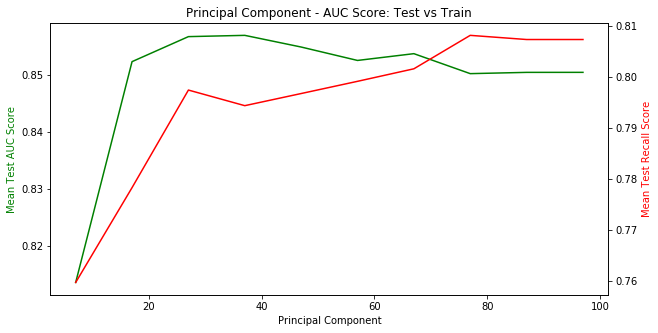

In [91]:
plot_param(log_reg_cv_results, 'param_pca__n_components', 'Principal Component')

#### Final Logistic Regression Model

False Positive Rate : [0.         0.21175858 1.        ]
True Positive Rate : [0.         0.83461538 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8114283999039462
Accuracy Score : 0.7911793372319688
Precision Score : 0.2104752667313288
Recall Score : 0.8346153846153846
F1 Score : 0.3361735089078234
Confusion Matrix : 
 [[6060 1628]
 [  86  434]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88      7688
           1       0.21      0.83      0.34       520

    accuracy                           0.79      8208
   macro avg       0.60      0.81      0.61      8208
weighted avg       0.94      0.79      0.84      8208



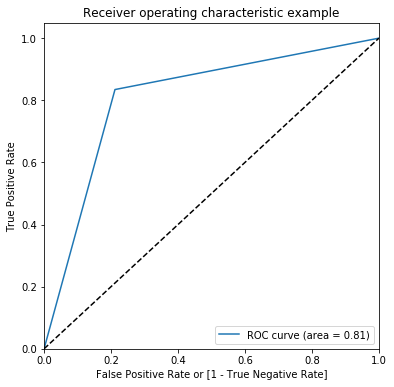

In [92]:
log_reg_pca, X_train_log_reg_pca, X_test_log_reg_pca = perform_pca(X_train_downsampled, X_test, 
                                                                   incremental_pca = True, n_components = 37)

final_log_reg = LogisticRegression()
final_log_reg.fit(X_train_log_reg_pca, y_train_downsampled)

y_pred_log_reg = final_log_reg.predict(X_test_log_reg_pca)
analyse_model(y_test, y_pred_log_reg)

### Decision Tree Classifier

#### Default Data

##### Without PCA

False Positive Rate : [0.         0.04916753 1.        ]
True Positive Rate : [0.  0.4 1. ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6754162330905307
Accuracy Score : 0.9159356725146199
Precision Score : 0.35494880546075086
Recall Score : 0.4
F1 Score : 0.37613019891500904
Confusion Matrix : 
 [[7310  378]
 [ 312  208]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      7688
           1       0.35      0.40      0.38       520

    accuracy                           0.92      8208
   macro avg       0.66      0.68      0.67      8208
weighted avg       0.92      0.92      0.92      8208



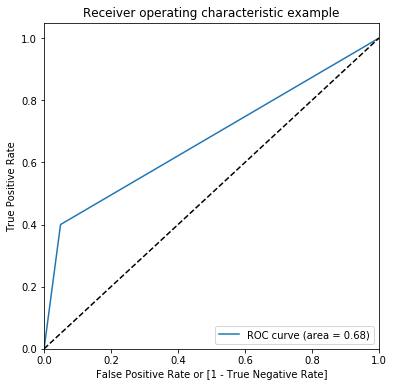

In [93]:
default_decision_tree = DecisionTreeClassifier(random_state = RANDOM_STATE)

default_decision_tree.fit(X_train, y_train)

y_pred_decision_tree_default = default_decision_tree.predict(X_test)

analyse_model(y_test, y_pred_decision_tree_default)

##### With PCA

False Positive Rate : [0.        0.0617846 1.       ]
True Positive Rate : [0.         0.29807692 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6181461618506364
Accuracy Score : 0.8976608187134503
Precision Score : 0.24603174603174602
Recall Score : 0.2980769230769231
F1 Score : 0.26956521739130435
Confusion Matrix : 
 [[7213  475]
 [ 365  155]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7688
           1       0.25      0.30      0.27       520

    accuracy                           0.90      8208
   macro avg       0.60      0.62      0.61      8208
weighted avg       0.91      0.90      0.90      8208



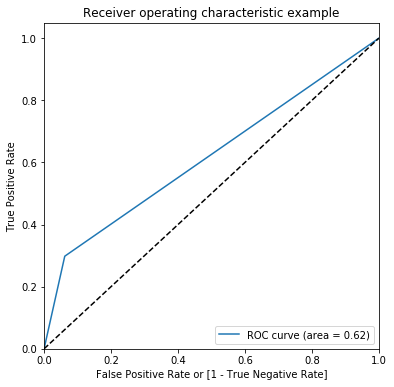

In [94]:
decision_tree_default_pca,\
X_train_decision_tree_default_pca, X_test_decision_tree_default_pca = perform_pca(X_train, X_test)

default_decision_tree_pca_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

default_decision_tree_pca_model.fit(X_train_decision_tree_default_pca, y_train)

y_pred_decision_tree_default_pca = default_decision_tree_pca_model.predict(X_test_decision_tree_default_pca)

analyse_model(y_test, y_pred_decision_tree_default_pca)

#### Downsampled major training data

##### Without PCA

False Positive Rate : [0.         0.22905827 1.        ]
True Positive Rate : [0.         0.78461538 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7777785559913551
Accuracy Score : 0.771807992202729
Precision Score : 0.18810511756569848
Recall Score : 0.7846153846153846
F1 Score : 0.3034585347712905
Confusion Matrix : 
 [[5927 1761]
 [ 112  408]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      7688
           1       0.19      0.78      0.30       520

    accuracy                           0.77      8208
   macro avg       0.58      0.78      0.58      8208
weighted avg       0.93      0.77      0.83      8208



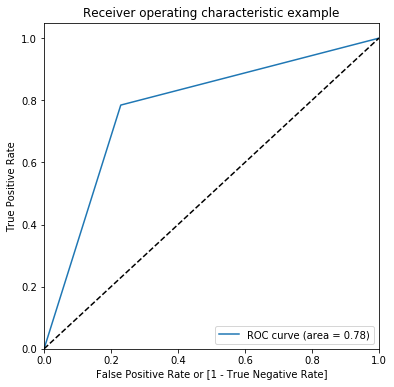

In [95]:
decision_tree_downsampled_default_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

decision_tree_downsampled_default_model.fit(X_train_downsampled, y_train_downsampled)

y_pred_decision_tree_downsampled_default = decision_tree_downsampled_default_model\
.predict(X_test)

analyse_model(y_test, y_pred_decision_tree_downsampled_default)

##### With PCA

False Positive Rate : [0.        0.3175078 1.       ]
True Positive Rate : [0.         0.73846154 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7104768670455455
Accuracy Score : 0.6860380116959064
Precision Score : 0.13592920353982302
Recall Score : 0.7384615384615385
F1 Score : 0.22959641255605384
Confusion Matrix : 
 [[5247 2441]
 [ 136  384]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.68      0.80      7688
           1       0.14      0.74      0.23       520

    accuracy                           0.69      8208
   macro avg       0.56      0.71      0.52      8208
weighted avg       0.92      0.69      0.77      8208



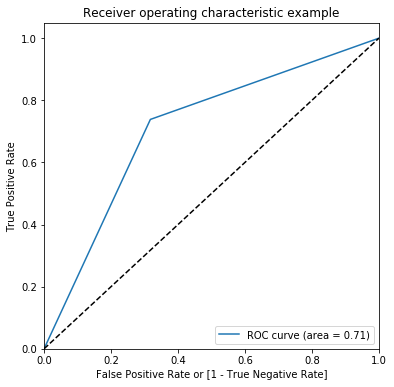

In [96]:
decision_tree_downsampled_default_pca,\
X_train_decision_tree_downsampled_default_pca,\
X_test_decision_tree_downsampled_default_pca = perform_pca(X_train_downsampled, X_test)

decision_tree_downsampled_default_pca_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

decision_tree_downsampled_default_pca_model.fit(X_train_decision_tree_downsampled_default_pca, y_train_downsampled)

y_pred_decision_tree_downsampled_default_pca = decision_tree_downsampled_default_pca_model\
.predict(X_test_decision_tree_downsampled_default_pca)

analyse_model(y_test, y_pred_decision_tree_downsampled_default_pca)

#### Oversampled minor training data

##### Without PCA

False Positive Rate : [0.         0.04279396 1.        ]
True Positive Rate : [0.         0.35384615 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6555260946129833
Accuracy Score : 0.9189814814814815
Precision Score : 0.3586744639376218
Recall Score : 0.35384615384615387
F1 Score : 0.35624394966118095
Confusion Matrix : 
 [[7359  329]
 [ 336  184]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      7688
           1       0.36      0.35      0.36       520

    accuracy                           0.92      8208
   macro avg       0.66      0.66      0.66      8208
weighted avg       0.92      0.92      0.92      8208



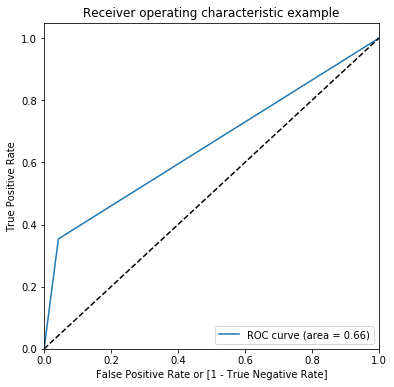

In [97]:
decision_tree_oversampled_default_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

decision_tree_oversampled_default_model.fit(X_train_oversampled, y_train_oversampled)

y_pred_decision_tree_oversampled_default = decision_tree_oversampled_default_model\
.predict(X_test)

analyse_model(y_test, y_pred_decision_tree_oversampled_default)

##### With PCA

False Positive Rate : [0.         0.05710198 1.        ]
True Positive Rate : [0.         0.25384615 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.598372088369487
Accuracy Score : 0.8992446393762183
Precision Score : 0.23117338003502627
Recall Score : 0.25384615384615383
F1 Score : 0.24197983501374884
Confusion Matrix : 
 [[7249  439]
 [ 388  132]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7688
           1       0.23      0.25      0.24       520

    accuracy                           0.90      8208
   macro avg       0.59      0.60      0.59      8208
weighted avg       0.90      0.90      0.90      8208



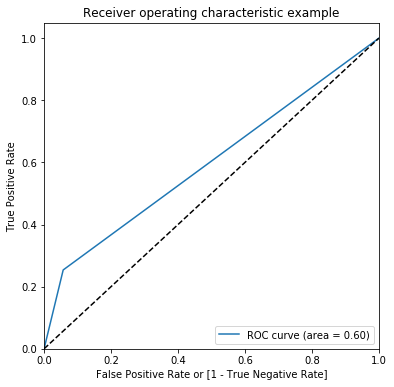

In [98]:
decision_tree_oversampled_default_pca,\
X_train_decision_tree_oversampled_default_pca,\
X_test_decision_tree_oversampled_default_pca = perform_pca(X_train_oversampled, X_test)

decision_tree_oversampled_default_pca_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

decision_tree_oversampled_default_pca_model.fit(X_train_decision_tree_oversampled_default_pca, y_train_oversampled)

y_pred_decision_tree_oversampled_pca_default = decision_tree_oversampled_default_pca_model\
.predict(X_test_decision_tree_oversampled_default_pca)

analyse_model(y_test, y_pred_decision_tree_oversampled_pca_default)

#### SMOTE Training Data

##### Without PCA

False Positive Rate : [0.         0.07973465 1.        ]
True Positive Rate : [0.         0.49230769 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7062865204514529
Accuracy Score : 0.8931530214424951
Precision Score : 0.2945914844649022
Recall Score : 0.49230769230769234
F1 Score : 0.36861051115910726
Confusion Matrix : 
 [[7075  613]
 [ 264  256]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      7688
           1       0.29      0.49      0.37       520

    accuracy                           0.89      8208
   macro avg       0.63      0.71      0.66      8208
weighted avg       0.92      0.89      0.91      8208



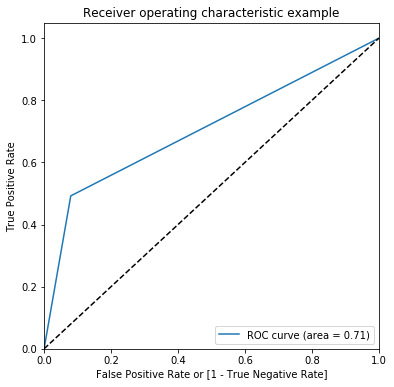

In [99]:
decision_tree_smote_default_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

decision_tree_smote_default_model.fit(X_train_smote, y_train_smote)

y_pred_decision_tree_smote_default = decision_tree_smote_default_model.predict(X_test)

analyse_model(y_test, y_pred_decision_tree_smote_default)

##### With PCA

False Positive Rate : [0.         0.12825182 1.        ]
True Positive Rate : [0.         0.41153846 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6416433202593452
Accuracy Score : 0.8425925925925926
Precision Score : 0.17833333333333334
Recall Score : 0.4115384615384615
F1 Score : 0.2488372093023256
Confusion Matrix : 
 [[6702  986]
 [ 306  214]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      7688
           1       0.18      0.41      0.25       520

    accuracy                           0.84      8208
   macro avg       0.57      0.64      0.58      8208
weighted avg       0.91      0.84      0.87      8208



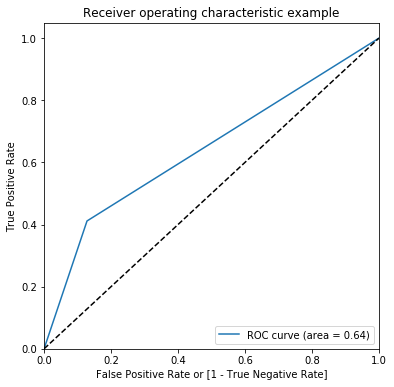

In [100]:
decision_tree_smote_default_pca,\
X_train_decision_tree_smote_default_pca, X_test_decision_tree_smote_default_pca = perform_pca(X_train_smote, X_test)

decision_tree_smote_default_pca_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

decision_tree_smote_default_pca_model.fit(X_train_decision_tree_smote_default_pca, y_train_smote)

y_pred_decision_tree_smote_default_pca = decision_tree_smote_default_pca_model\
.predict(X_test_decision_tree_smote_default_pca)

analyse_model(y_test, y_pred_decision_tree_smote_default_pca)

<b>Training Data with Downsampling major class imbalance technique without PCA seems to be providing best overall performance for churn class prediction. Hence, using the same to hypertune parameters</b> 

#### Initialising parameters and setting pipeline

In [101]:
decision_tree_max_depth = range(2, 11, 1)
decision_tree_min_samples_leaf = range(1, 251, 50)

decision_tree_parameters = {'decision_tree__min_samples_leaf': decision_tree_min_samples_leaf,
                            'decision_tree__max_depth': decision_tree_max_depth}

decision_tree = DecisionTreeClassifier(random_state = RANDOM_STATE)

decision_tree_pipeline = Pipeline(steps=[('decision_tree', decision_tree)])

#### Hyperparameters Tuning

In [102]:
decision_tree_grid_search = prepare_grid_search(decision_tree_pipeline, decision_tree_parameters)
decision_tree_cv_results = perform_grid_search(decision_tree_grid_search, 
                                               X_train_downsampled, y_train_downsampled)

{'decision_tree__min_samples_leaf': range(1, 251, 50),
 'decision_tree__max_depth': range(2, 11)}

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    5.7s finished


Best roc_auc score after hyperparameters tuning : 0.8790300318775739
Best parameters after hyperparameters tuning for roc_auc score : {'decision_tree__max_depth': 6, 'decision_tree__min_samples_leaf': 51}


#### Validating hyperparameters tuning results

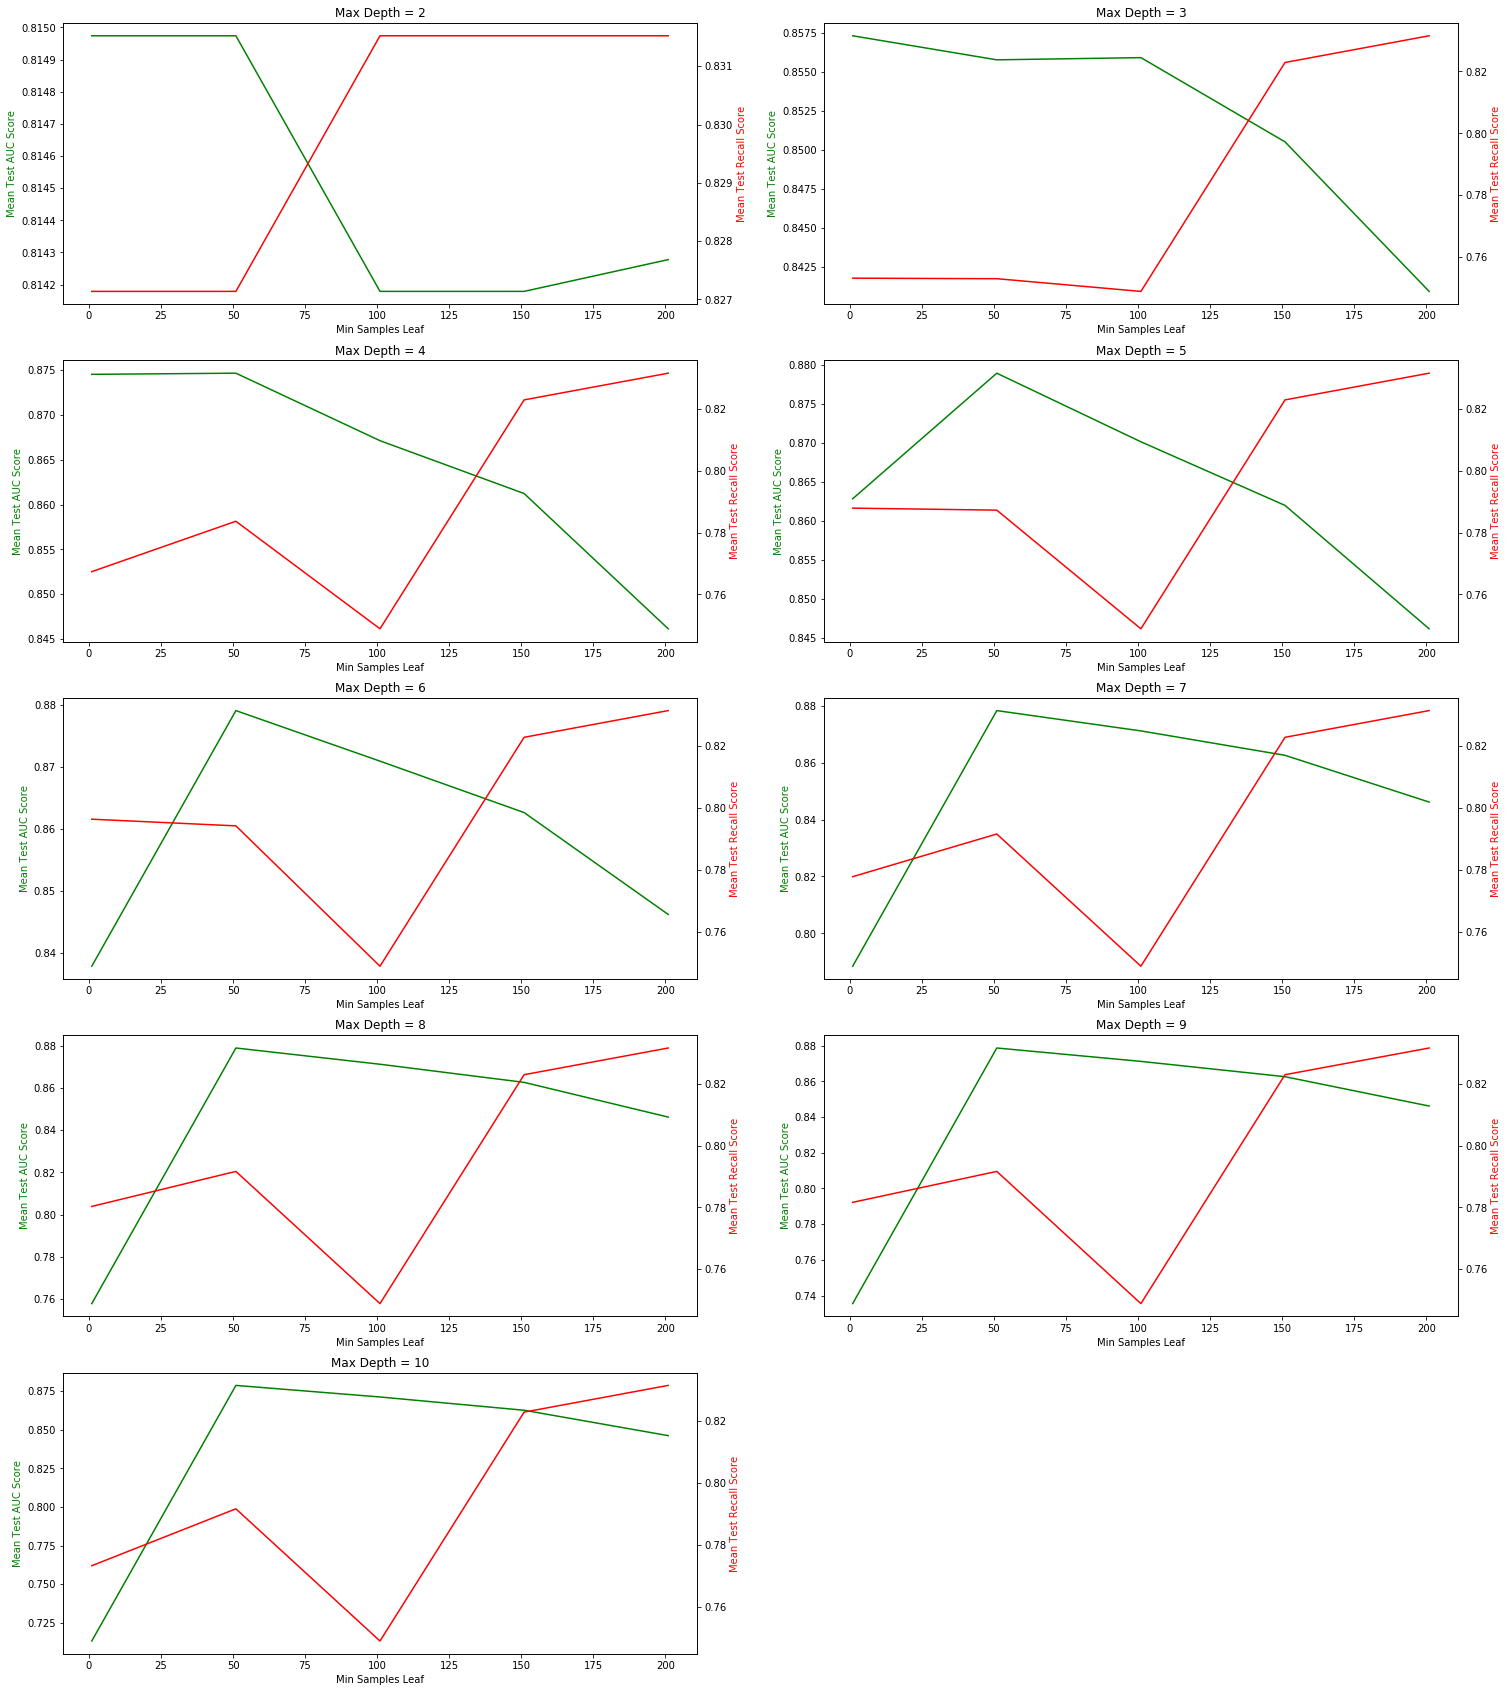

In [103]:
plot_params(decision_tree_cv_results, 'param_decision_tree__max_depth',
                    'param_decision_tree__min_samples_leaf','Max Depth','Min Samples Leaf')

#### Final Decision Tree Classifier Model

False Positive Rate : [0.         0.19940166 1.        ]
True Positive Rate : [0.         0.88846154 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8445299367645882
Accuracy Score : 0.8061647173489279
Precision Score : 0.23157894736842105
Recall Score : 0.8884615384615384
F1 Score : 0.3673956262425447
Confusion Matrix : 
 [[6155 1533]
 [  58  462]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      7688
           1       0.23      0.89      0.37       520

    accuracy                           0.81      8208
   macro avg       0.61      0.84      0.63      8208
weighted avg       0.94      0.81      0.85      8208



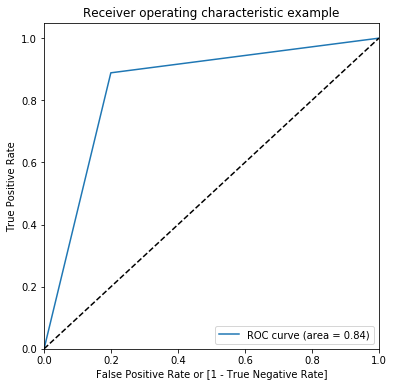

In [104]:
final_decision_tree = DecisionTreeClassifier(random_state = RANDOM_STATE, min_samples_leaf = 50, max_depth = 6)
final_decision_tree.fit(X_train_downsampled, y_train_downsampled)

y_pred_decision_tree = final_decision_tree.predict(X_test)
analyse_model(y_test, y_pred_decision_tree)

#### Plotting final decision tree

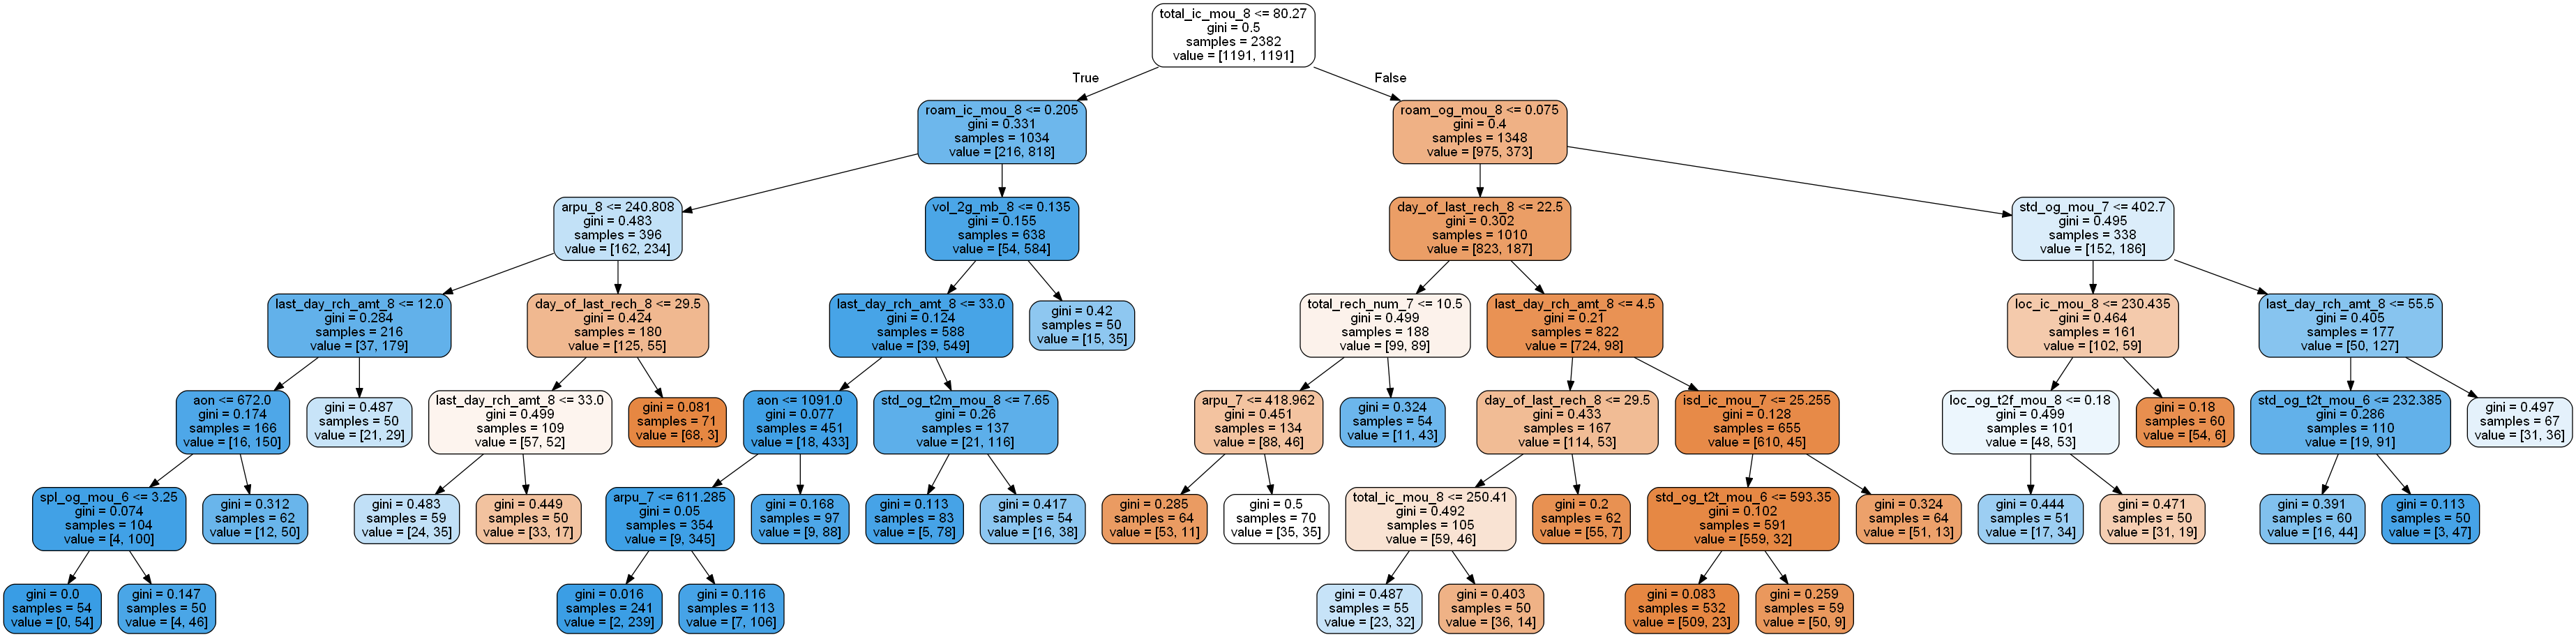

In [105]:
# plotting tree with best params after hyperparameter tuning
dot_data = StringIO()  
export_graphviz(final_decision_tree, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Random Forest Classifier

<b>Since Random Forest is an ensemble of Decision Trees. Therefore, using Downsampling major class imbalance technique without PCA data set to train model.</b>

#### Default Random Forest Classifier Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


False Positive Rate : [0.         0.12565036 1.        ]
True Positive Rate : [0.         0.74038462 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8073671255903306
Accuracy Score : 0.8658625730994152
Precision Score : 0.2849740932642487
Recall Score : 0.7403846153846154
F1 Score : 0.4115446285408872
Confusion Matrix : 
 [[6722  966]
 [ 135  385]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      7688
           1       0.28      0.74      0.41       520

    accuracy                           0.87      8208
   macro avg       0.63      0.81      0.67      8208
weighted avg       0.94      0.87      0.89      8208



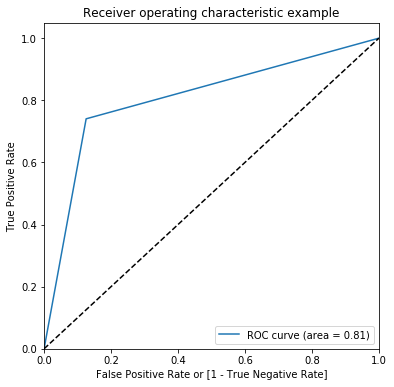

Out of Bag Error : 0.7737195633921075


In [106]:
random_forest_default_model = RandomForestClassifier(random_state = RANDOM_STATE, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1)
random_forest_default_model.fit(X_train_downsampled, y_train_downsampled)

y_pred_random_forest_default = random_forest_default_model.predict(X_test)
analyse_model(y_test, y_pred_random_forest_default)
print('Out of Bag Error : {}'.format(random_forest_default_model.oob_score_))

#### Initialising parameters and setting pipeline

In [107]:
random_forest_max_features = range(12, 71, 4)
random_forest_n_estimators = range(100, 1001, 100)

random_forest_parameters = {'random_forest__max_features': random_forest_max_features, 
                           'random_forest__n_estimators': random_forest_n_estimators}

random_forest = RandomForestClassifier(random_state = RANDOM_STATE, oob_score = True, warm_start = True, n_jobs= -1)

random_forest_pipeline = Pipeline(steps=[('random_forest', random_forest)])

#### Hyperparameters Tuning

In [108]:
random_forest_grid_search = prepare_grid_search(random_forest_pipeline, random_forest_parameters, cv_fold_split = 2)
random_forest_cv_results = perform_grid_search(random_forest_grid_search, X_train_downsampled, y_train_downsampled)

{'random_forest__max_features': range(12, 71, 4),
 'random_forest__n_estimators': range(100, 1001, 100)}

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.5min finished


Best roc_auc score after hyperparameters tuning : 0.9128799857690635
Best parameters after hyperparameters tuning for roc_auc score : {'random_forest__max_features': 44, 'random_forest__n_estimators': 400}


#### Validating hyperparameters tuning results

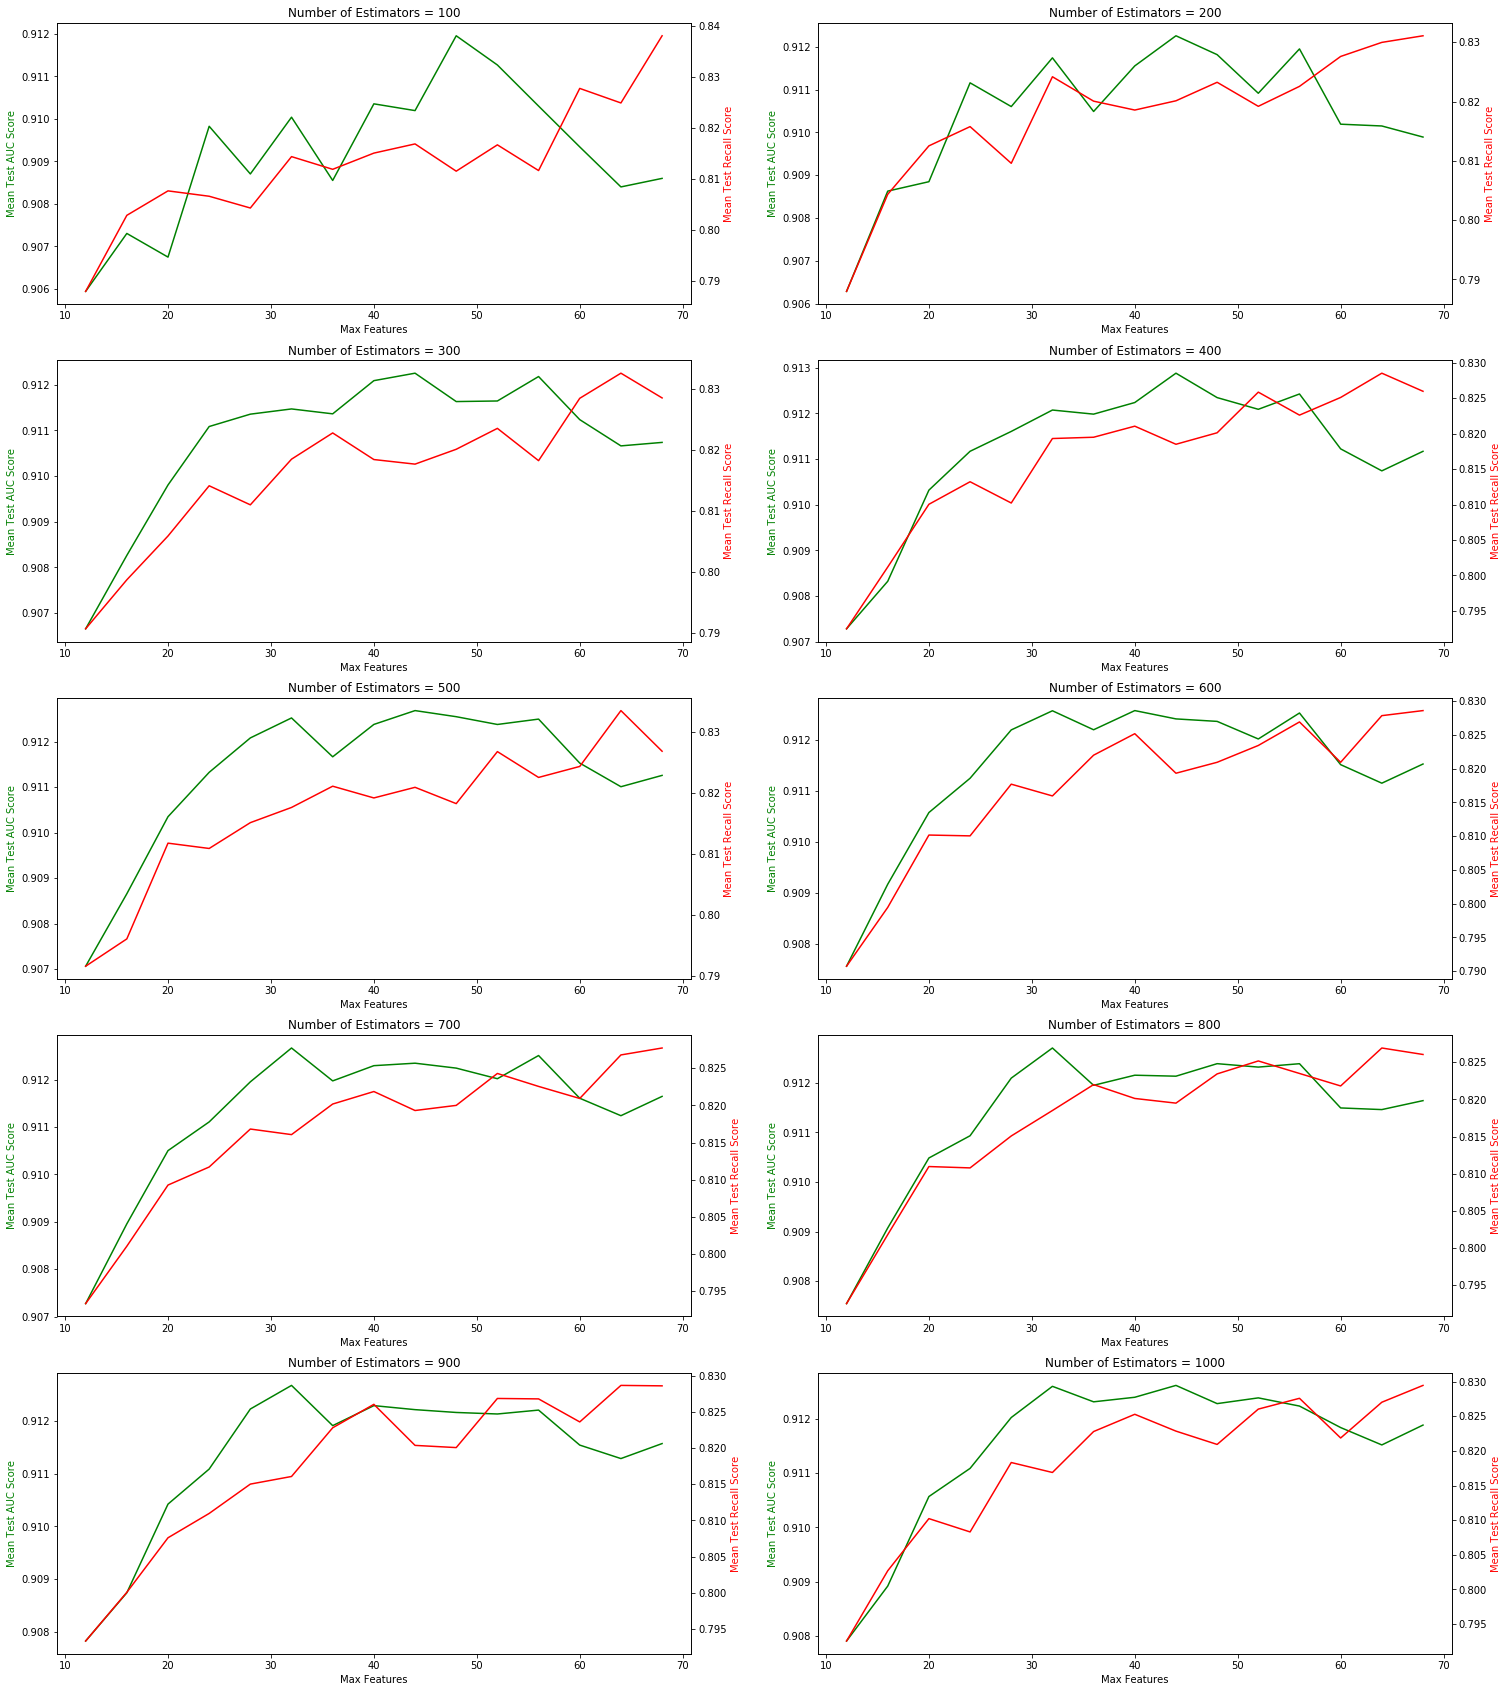

In [109]:
plot_params(random_forest_cv_results, 'param_random_forest__n_estimators', 'param_random_forest__max_features', 
            'Number of Estimators', 'Max Features')

#### Final Random Forest Classifier Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.1s finished


False Positive Rate : [0.         0.14021852 1.        ]
True Positive Rate : [0.         0.86730769 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8635445849675818
Accuracy Score : 0.8602582846003899
Precision Score : 0.2949640287769784
Recall Score : 0.8673076923076923
F1 Score : 0.440214738897023
Confusion Matrix : 
 [[6610 1078]
 [  69  451]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7688
           1       0.29      0.87      0.44       520

    accuracy                           0.86      8208
   macro avg       0.64      0.86      0.68      8208
weighted avg       0.95      0.86      0.89      8208



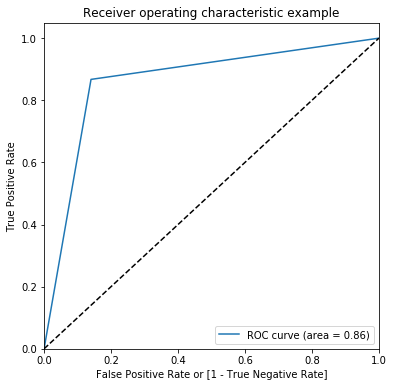

In [110]:
random_forest_final_model = RandomForestClassifier(random_state = RANDOM_STATE, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1, max_features = 44, n_estimators = 400)
random_forest_final_model.fit(X_train_downsampled, y_train_downsampled)

y_pred_random_forest_final = random_forest_final_model.predict(X_test)
analyse_model(y_test, y_pred_random_forest_final)

### Balanced Random Forest Classifier

<b>Since Balanced Random Forest uses a sampling strategy to handle class imbalance with underlying Random Forest implementation. Therefore, using default without PCA data set to train model.</b>

#### Default Balanced Random Forest Classifier Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


False Positive Rate : [0.         0.13540583 1.        ]
True Positive Rate : [0.         0.84230769 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8534509325222125
Accuracy Score : 0.863182261208577
Precision Score : 0.2961460446247465
Recall Score : 0.8423076923076923
F1 Score : 0.43821910955477744
Confusion Matrix : 
 [[6647 1041]
 [  82  438]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7688
           1       0.30      0.84      0.44       520

    accuracy                           0.86      8208
   macro avg       0.64      0.85      0.68      8208
weighted avg       0.94      0.86      0.89      8208



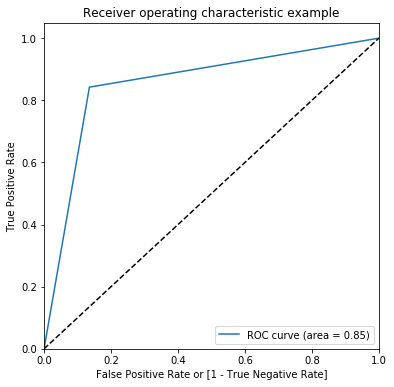

In [111]:
balanced_random_forest_default_model = BalancedRandomForestClassifier(random_state = RANDOM_STATE, 
                                                                      oob_score = True, n_jobs = -1,
                                                                      warm_start=True, verbose = 1,
                                                                     replacement = True,
                                                                     class_weight = 'balanced_subsample')
balanced_random_forest_default_model.fit(X_train, y_train)

y_pred_balanced_random_forest_default = balanced_random_forest_default_model.predict(X_test)
analyse_model(y_test, y_pred_balanced_random_forest_default)

#### Initialising parameters and setting pipeline

In [112]:
balanced_random_forest_n_estimators = range(100, 2001, 200)

balanced_random_forest_parameters = {'balanced_random_forest__n_estimators': balanced_random_forest_n_estimators}

balanced_random_forest = BalancedRandomForestClassifier(random_state = RANDOM_STATE, 
                                                                      oob_score = True, n_jobs = -1,
                                                                      warm_start=True,
                                                                     replacement = True,
                                                                     class_weight = 'balanced_subsample')

balanced_random_forest_pipeline = Pipeline(steps=[('balanced_random_forest', balanced_random_forest)])

#### Hyperparameters Tuning

In [113]:
balanced_random_forest_grid_search = prepare_grid_search(balanced_random_forest_pipeline, 
                                                balanced_random_forest_parameters, cv_fold_split = 2)
balanced_random_forest_cv_results = perform_grid_search(balanced_random_forest_grid_search, 
                                                        X_train, y_train)

{'balanced_random_forest__n_estimators': range(100, 2001, 200)}

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.7min finished


Best roc_auc score after hyperparameters tuning : 0.9067417526005983
Best parameters after hyperparameters tuning for roc_auc score : {'balanced_random_forest__n_estimators': 300}


#### Validating hyperparameters tuning results

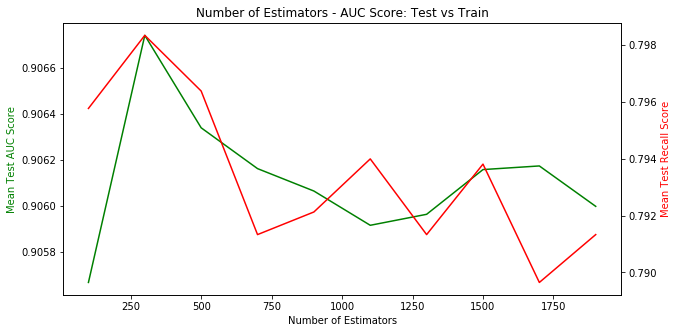

In [114]:
plot_param(balanced_random_forest_cv_results, 'param_balanced_random_forest__n_estimators', 'Number of Estimators')

#### Final Balanced Random Forest Classifier Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


False Positive Rate : [0.         0.13111342 1.        ]
True Positive Rate : [0.         0.83461538 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8517509805491076
Accuracy Score : 0.8667153996101364
Precision Score : 0.30097087378640774
Recall Score : 0.8346153846153846
F1 Score : 0.44240570846075433
Confusion Matrix : 
 [[6680 1008]
 [  86  434]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      7688
           1       0.30      0.83      0.44       520

    accuracy                           0.87      8208
   macro avg       0.64      0.85      0.68      8208
weighted avg       0.94      0.87      0.89      8208



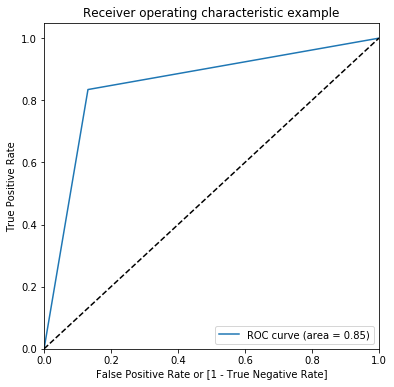

In [115]:
balanced_random_forest_final_model = BalancedRandomForestClassifier(random_state = RANDOM_STATE, 
                                                                    oob_score = True, n_jobs = -1,
                                                                    warm_start=True, verbose = 1,
                                                                    replacement = True,
                                                                    class_weight = 'balanced_subsample', 
                                                                    n_estimators = 300)

balanced_random_forest_final_model.fit(X_train, y_train)

y_pred_balanced_random_forest_final = balanced_random_forest_final_model.predict(X_test)
analyse_model(y_test, y_pred_balanced_random_forest_final)

### Ada Boost Classifier

<b>Since Ada Boost is an ensemble of Decision Trees. Therefore, using Downsampling major class imbalance technique without PCA data set to train model.</b>

#### Default Ada Boost Classifier Model

False Positive Rate : [0.         0.17182622 1.        ]
True Positive Rate : [0.         0.81923077 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.823702273273033
Accuracy Score : 0.8276072124756335
Precision Score : 0.24384659416141957
Recall Score : 0.8192307692307692
F1 Score : 0.3758270842523158
Confusion Matrix : 
 [[6367 1321]
 [  94  426]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      7688
           1       0.24      0.82      0.38       520

    accuracy                           0.83      8208
   macro avg       0.61      0.82      0.64      8208
weighted avg       0.94      0.83      0.87      8208



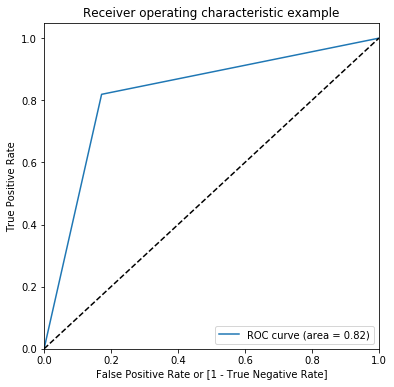

In [116]:
ada_boost_default_model = AdaBoostClassifier(random_state = RANDOM_STATE)
ada_boost_default_model.fit(X_train_downsampled, y_train_downsampled)

y_pred_ada_boost_default = ada_boost_default_model.predict(X_test)
analyse_model(y_test, y_pred_ada_boost_default)

#### Initialising parameters and setting pipeline

In [117]:
ada_boost_n_estimators = range(50, 1051, 100)

ada_boost_parameters = {'ada_boost__n_estimators': ada_boost_n_estimators}

ada_boost = AdaBoostClassifier(random_state = RANDOM_STATE)

ada_boost_pipeline = Pipeline(steps=[('ada_boost', ada_boost)])

#### Hyperparameters Tuning

In [118]:
ada_boost_grid_search = prepare_grid_search(ada_boost_pipeline, ada_boost_parameters, cv_fold_split = 2)
ada_boost_cv_results = perform_grid_search(ada_boost_grid_search, X_train_downsampled, y_train_downsampled)

{'ada_boost__n_estimators': range(50, 1051, 100)}

Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  1.1min finished


Best roc_auc score after hyperparameters tuning : 0.8831983182647294
Best parameters after hyperparameters tuning for roc_auc score : {'ada_boost__n_estimators': 50}


#### Validating hyperparameters tuning results

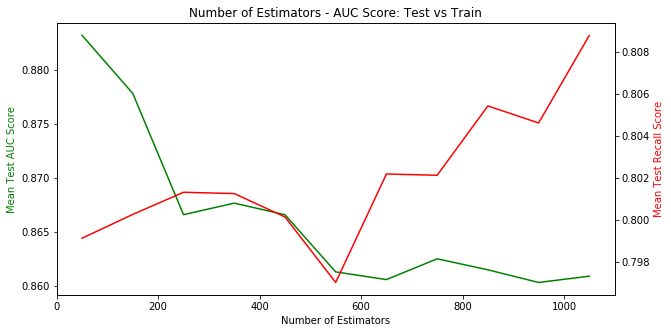

In [119]:
plot_param(ada_boost_cv_results, 'param_ada_boost__n_estimators','Number of Estimators')

#### Final Ada Boost Classifier Model

False Positive Rate : [0.         0.17182622 1.        ]
True Positive Rate : [0.         0.81923077 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.823702273273033
Accuracy Score : 0.8276072124756335
Precision Score : 0.24384659416141957
Recall Score : 0.8192307692307692
F1 Score : 0.3758270842523158
Confusion Matrix : 
 [[6367 1321]
 [  94  426]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      7688
           1       0.24      0.82      0.38       520

    accuracy                           0.83      8208
   macro avg       0.61      0.82      0.64      8208
weighted avg       0.94      0.83      0.87      8208



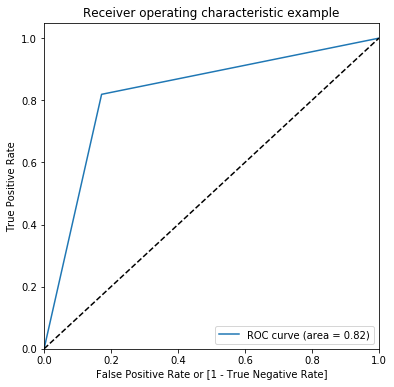

In [120]:
ada_boost_final_model = AdaBoostClassifier(random_state = RANDOM_STATE, n_estimators = 50)
ada_boost_final_model.fit(X_train_downsampled, y_train_downsampled)

y_pred_ada_boost_final = ada_boost_final_model.predict(X_test)
analyse_model(y_test, y_pred_ada_boost_final)

### RUS Boost Classifier

<b>Since RUS uses a sampling strategy to handle class imbalance with underlying Ada Boost implementation. Therefore, using default without PCA data set to train model.</b>

#### Default RUS Boost Classifier Model

False Positive Rate : [0.        0.1403486 1.       ]
True Positive Rate : [0.         0.78269231 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8211718562394941
Accuracy Score : 0.854775828460039
Precision Score : 0.27388963660834453
Recall Score : 0.7826923076923077
F1 Score : 0.4057826520438683
Confusion Matrix : 
 [[6609 1079]
 [ 113  407]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      7688
           1       0.27      0.78      0.41       520

    accuracy                           0.85      8208
   macro avg       0.63      0.82      0.66      8208
weighted avg       0.94      0.85      0.88      8208



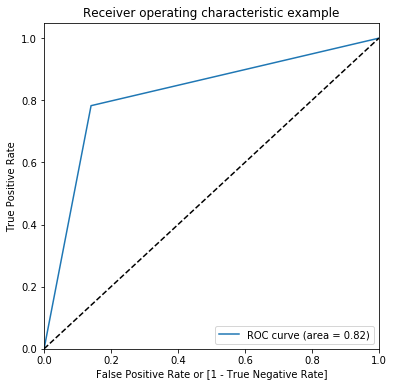

In [121]:
rus_boost_default_model = RUSBoostClassifier(random_state = RANDOM_STATE)
rus_boost_default_model.fit(X_train, y_train)

y_pred_rus_boost_default = rus_boost_default_model.predict(X_test)
analyse_model(y_test, y_pred_rus_boost_default)

#### Initialising parameters and setting pipeline

In [122]:
rus_boost_n_estimators = range(50, 1051, 100)

rus_boost_parameters = {'rus_boost__n_estimators': rus_boost_n_estimators}

rus_boost = RUSBoostClassifier(random_state = RANDOM_STATE)

rus_boost_pipeline = Pipeline(steps=[('rus_boost', rus_boost)])

#### Hyperparameters Tuning

In [123]:
rus_boost_grid_search = prepare_grid_search(rus_boost_pipeline, rus_boost_parameters, cv_fold_split = 2)
rus_boost_cv_results = perform_grid_search(rus_boost_grid_search, X_train, y_train)

{'rus_boost__n_estimators': range(50, 1051, 100)}

Fitting 2 folds for each of 11 candidates, totalling 22 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  4.6min finished


Best roc_auc score after hyperparameters tuning : 0.8734145249291161
Best parameters after hyperparameters tuning for roc_auc score : {'rus_boost__n_estimators': 50}


#### Validating hyperparameters tuning results

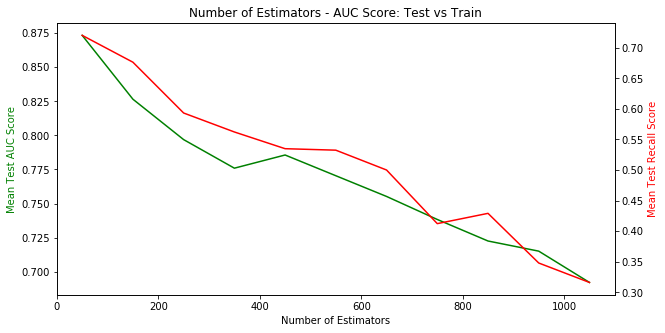

In [124]:
plot_param(rus_boost_cv_results, 'param_rus_boost__n_estimators','Number of Estimators')

#### Final RUS Boost Classifier Model

False Positive Rate : [0.        0.1403486 1.       ]
True Positive Rate : [0.         0.78269231 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8211718562394941
Accuracy Score : 0.854775828460039
Precision Score : 0.27388963660834453
Recall Score : 0.7826923076923077
F1 Score : 0.4057826520438683
Confusion Matrix : 
 [[6609 1079]
 [ 113  407]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      7688
           1       0.27      0.78      0.41       520

    accuracy                           0.85      8208
   macro avg       0.63      0.82      0.66      8208
weighted avg       0.94      0.85      0.88      8208



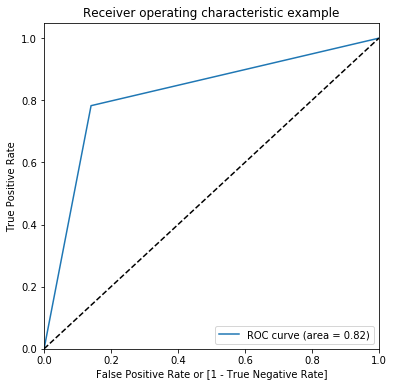

In [125]:
rus_boost_final_model = RUSBoostClassifier(random_state = RANDOM_STATE, n_estimators = 50)
rus_boost_final_model.fit(X_train, y_train)

y_pred_rus_boost_final = rus_boost_final_model.predict(X_test)
analyse_model(y_test, y_pred_rus_boost_final)

### SVM

<b>Using Downsampling major class imbalance technique with PCA data set to train model.</b>

#### Data Preparation

In [126]:
X_train_svc_scaled, X_test_svc_scaled = perform_standard_scaling(X_train_downsampled, X_test)

svm_pca, X_train_svm_pca, X_test_svm_pca = perform_pca(X_train_downsampled, X_test)

#### Default SVM Classifier Model

False Positive Rate : [0.         0.16558273 1.        ]
True Positive Rate : [0.         0.79038462 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8124009445289362
Accuracy Score : 0.8316276803118908
Precision Score : 0.24406175771971497
Recall Score : 0.7903846153846154
F1 Score : 0.37295825771324864
Confusion Matrix : 
 [[6415 1273]
 [ 109  411]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      7688
           1       0.24      0.79      0.37       520

    accuracy                           0.83      8208
   macro avg       0.61      0.81      0.64      8208
weighted avg       0.94      0.83      0.87      8208



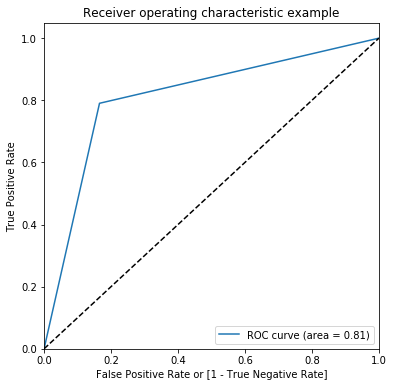

In [127]:
svc_default_model = SVC(random_state = RANDOM_STATE)

svc_default_model.fit(X_train_svm_pca, y_train_downsampled)
y_pred_svc_default = svc_default_model.predict(X_test_svm_pca)

analyse_model(y_test, y_pred_svc_default)

#### Initialising parameters and setting pipeline

In [128]:
svc_pca_components = range(19, X_train.shape[1] + 1, 10)

svc_c = [1, 10, 100, 1000]
svc_gamma = [1e-2, 1e-3, 1e-4]
                     

svc_parameters = {'pca__n_components': svc_pca_components, 
    'svc__C': svc_c,'svc__gamma' : svc_gamma}

svc = SVC(random_state = RANDOM_STATE, kernel='rbf')

svc_pipeline = Pipeline(steps=[('pca', default_incremental_pca),('svc', svc)])

#### Hyperparameters Tuning

In [129]:
svc_grid_search = prepare_grid_search(svc_pipeline, svc_parameters, cv_fold_split = 3)
svc_cv_results = perform_grid_search(svc_grid_search, X_train_svm_pca, y_train_downsampled)

{'pca__n_components': range(19, 105, 10),
 'svc__C': [1, 10, 100, 1000],
 'svc__gamma': [0.01, 0.001, 0.0001]}

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.3min finished


Best roc_auc score after hyperparameters tuning : 0.86337896792829
Best parameters after hyperparameters tuning for roc_auc score : {'pca__n_components': 89, 'svc__C': 1, 'svc__gamma': 0.01}


#### Validating hyperparameters tuning results

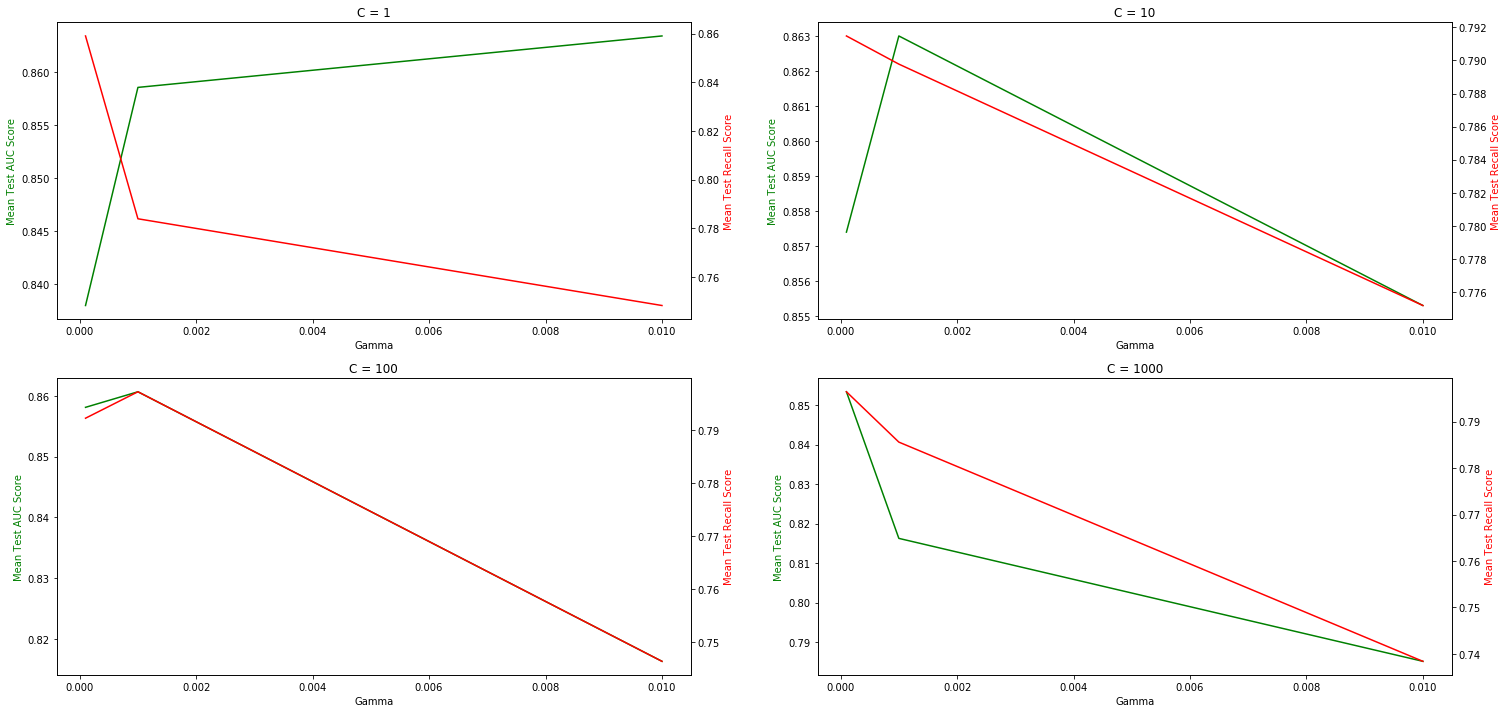

In [130]:
svc_cv_results_89_pca_components = svc_cv_results[svc_cv_results['param_pca__n_components'] == 89]

plot_params(svc_cv_results_89_pca_components, 'param_svc__C', 'param_svc__gamma', 'C', 'Gamma')

#### Final SVM Classifier Model

False Positive Rate : [0.         0.16441207 1.        ]
True Positive Rate : [0.         0.78846154 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8120247338509565
Accuracy Score : 0.8326023391812866
Precision Score : 0.24492234169653523
Recall Score : 0.7884615384615384
F1 Score : 0.373746581586144
Confusion Matrix : 
 [[6424 1264]
 [ 110  410]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      7688
           1       0.24      0.79      0.37       520

    accuracy                           0.83      8208
   macro avg       0.61      0.81      0.64      8208
weighted avg       0.94      0.83      0.87      8208



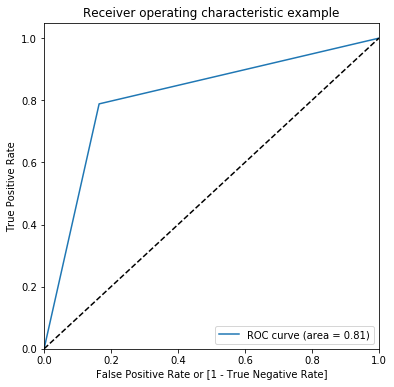

In [131]:
svc_pca_final, X_train_svc_pca_final, X_test_svc_pca_final  = perform_pca(X_train_downsampled, X_test, 
                                                                          incremental_pca = True, n_components = 89)

svc_final_model = SVC(kernel='rbf', C= 1, gamma = 0.01)
svc_final_model.fit(X_train_svc_pca_final, y_train_downsampled)

y_pred_svc_final = svc_final_model.predict(X_test_svc_pca_final)
analyse_model(y_test, y_pred_svc_final)

### XGBoost

<b>Since XGBoost is an ensemble of Decision Trees. Therefore, continuing with Downsampling major class without PCA data to train model.</b>

#### Default XG Boost Classifier Model

False Positive Rate : [0.         0.14021852 1.        ]
True Positive Rate : [0.         0.88076923 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.870275354198351
Accuracy Score : 0.8611111111111112
Precision Score : 0.2981770833333333
Recall Score : 0.8807692307692307
F1 Score : 0.44552529182879375
Confusion Matrix : 
 [[6610 1078]
 [  62  458]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7688
           1       0.30      0.88      0.45       520

    accuracy                           0.86      8208
   macro avg       0.64      0.87      0.68      8208
weighted avg       0.95      0.86      0.89      8208



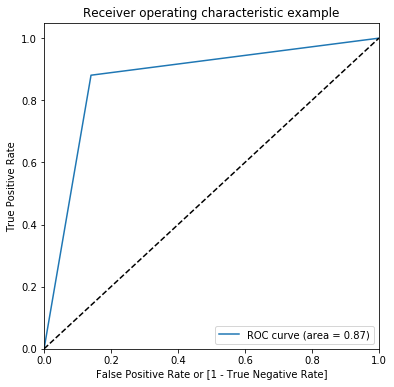

In [132]:
xg_boost_default_model = XGBClassifier(random_state = RANDOM_STATE,  
                                       verbosity = 1, n_jobs = -1)
xg_boost_default_model.fit(X_train_downsampled, y_train_downsampled)

y_pred_xg_boost_default = xg_boost_default_model.predict(X_test)
analyse_model(y_test, y_pred_xg_boost_default)

#### Initialising parameters and setting pipeline

In [133]:
xg_boost_n_estimators = range(100, 2001, 100)

xg_boost_parameters = {'xg_boost__n_estimators': xg_boost_n_estimators}

xg_boost = XGBClassifier(random_state = RANDOM_STATE,  n_jobs = -1)

xg_boost_pipeline = Pipeline(steps=[('xg_boost', xg_boost)])

#### Hyperparameters Tuning

In [134]:
xg_boost_grid_search = prepare_grid_search(xg_boost_pipeline, xg_boost_parameters, cv_fold_split = 2)
xg_boost_cv_results = perform_grid_search(xg_boost_grid_search, X_train_downsampled, y_train_downsampled)

{'xg_boost__n_estimators': range(100, 2001, 100)}

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


Best roc_auc score after hyperparameters tuning : 0.9157057019748249
Best parameters after hyperparameters tuning for roc_auc score : {'xg_boost__n_estimators': 100}


#### Validating hyperparameters tuning results

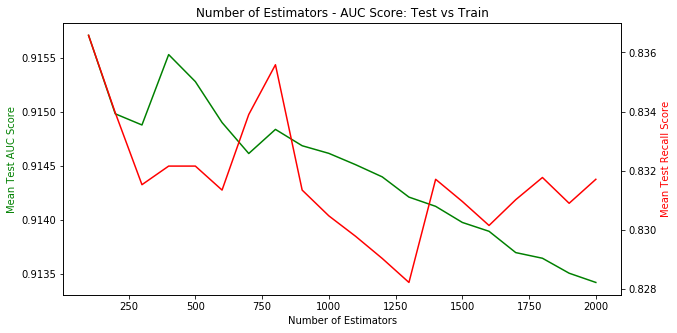

In [135]:
plot_param(xg_boost_cv_results, 'param_xg_boost__n_estimators', 'Number of Estimators')

#### Final XG Boost Classifier Model

False Positive Rate : [0.         0.14021852 1.        ]
True Positive Rate : [0.         0.88076923 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.870275354198351
Accuracy Score : 0.8611111111111112
Precision Score : 0.2981770833333333
Recall Score : 0.8807692307692307
F1 Score : 0.44552529182879375
Confusion Matrix : 
 [[6610 1078]
 [  62  458]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7688
           1       0.30      0.88      0.45       520

    accuracy                           0.86      8208
   macro avg       0.64      0.87      0.68      8208
weighted avg       0.95      0.86      0.89      8208



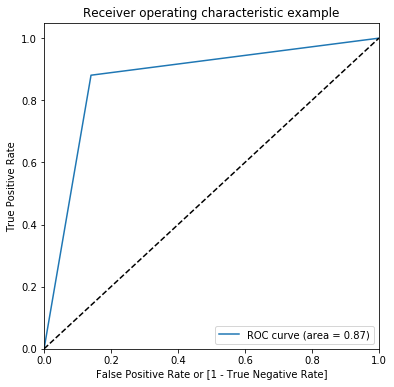

In [136]:
xg_boost_final_model = XGBClassifier(random_state = RANDOM_STATE,  
                                       verbosity = 1, n_jobs = -1, n_estimators = 100)
xg_boost_final_model.fit(X_train_downsampled, y_train_downsampled)

y_pred_xg_boost_final = xg_boost_final_model.predict(X_test)
analyse_model(y_test, y_pred_xg_boost_final)

### Step 6 - Model Selection

<b>All above mentioned algorithm implementations have also been tested with default data and other class imbalance techiques such as oversampling minor class, SMOTE. The same has also been tested with/without PCA to cross-check the performance with chosen class imbalance technique and PCA option. 
<br/><br/>
All above mentioned algorithm implementations have also been hypertuned and tested with other parameters.
<br/><br/>
For each implemented algorithm, only the class imbalance technique with PCA option and hyperparameter tuning providing the best result have been retained above.
<br/><br/>
Following class imbalance and PCA option have been used for above mentioned algorithm implementation:
- Downsampled major class train data set without PCA for decision trees based algorithms.
- Default train data set without PCA for balanced decision trees based algorithms.
- Downsampled major class train data set with PCA for logistic regression and SVM algorithms. 
</b>

Out of all implemented algorithms, <b>xg_boost_final_model</b> seems to be the best model for churn prediction based on selected evaluation metrics of <b>Recall</b> and <b>AUC</b> Score. 

### Key Performance Indicator Selection

#### Identifying KPI

In [137]:
sel = SelectFromModel(random_forest_final_model)
sel.fit(X_train_downsampled, y_train_downsampled)

kpi_feature_results = pd.DataFrame(list(zip(X_train.columns, sel.get_support(), 
                                            random_forest_final_model.feature_importances_)))
kpi_feature_results.columns = ('column_name', 'support', 'importance')
kpi_feature_results = kpi_feature_results[kpi_feature_results['support'] == True]
kpi_feature_results.reset_index(inplace = True, drop = True)
kpi_feature_results.drop('support', axis = 1, inplace = True)
kpi_feature_results = kpi_feature_results.sort_values(by='importance', ascending = False)
kpi_results = kpi_feature_results['column_name']
display(kpi_feature_results)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.1s finished


column_name  importance
11      total_ic_mou_8    0.114806
3        roam_og_mou_8    0.080232
10        loc_ic_mou_8    0.066040
17  day_of_last_rech_8    0.062103
2        roam_ic_mou_8    0.045052
9     loc_ic_t2m_mou_8    0.044131
14  last_day_rch_amt_8    0.034364
1               arpu_8    0.025384
5         loc_og_mou_8    0.018106
12    total_rech_num_7    0.016174
4     loc_og_t2m_mou_8    0.016097
7       total_og_mou_8    0.015748
16                 aon    0.013361
0               arpu_7    0.012703
6         std_og_mou_8    0.011203
8     loc_ic_t2t_mou_8    0.010888
13      max_rech_amt_8    0.010380
15         vol_3g_mb_8    0.010003

#### Analysing corelation between KPI

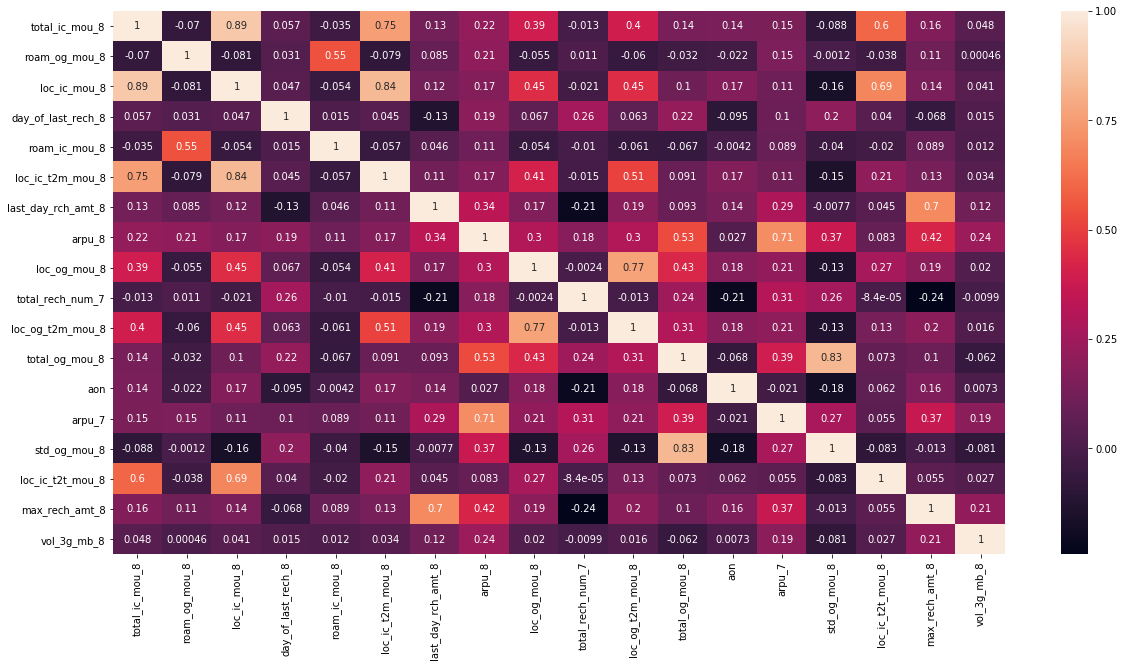

In [138]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train[kpi_results].corr(), annot = True)
plt.show()

#### Analysing corelated KPI

In [139]:
# Create correlation matrix
kpi_corr_matrix = X_train[kpi_results].corr().abs()

# Select upper triangle of correlation matrix
kpi_upper = kpi_corr_matrix.where(np.triu(np.ones(kpi_corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.5
kpi_corr_columns = [column for column in kpi_upper.columns if any(kpi_upper[column] >= 0.5)]

print('KPI corelated columns : \n {}'.format(kpi_corr_columns))

kpi_feature_results_without_corr = kpi_feature_results[~kpi_feature_results['column_name']
                                                       .isin(kpi_corr_columns)].copy()

kpi_results_without_corr = kpi_feature_results_without_corr['column_name']
display(kpi_feature_results_without_corr)

KPI corelated columns : 
 ['loc_ic_mou_8', 'roam_ic_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'total_og_mou_8', 'arpu_7', 'std_og_mou_8', 'loc_ic_t2t_mou_8', 'max_rech_amt_8']


column_name  importance
11      total_ic_mou_8    0.114806
3        roam_og_mou_8    0.080232
17  day_of_last_rech_8    0.062103
14  last_day_rch_amt_8    0.034364
1               arpu_8    0.025384
5         loc_og_mou_8    0.018106
12    total_rech_num_7    0.016174
16                 aon    0.013361
15         vol_3g_mb_8    0.010003

#### Validating corelation between KPI after removing highly corelated features

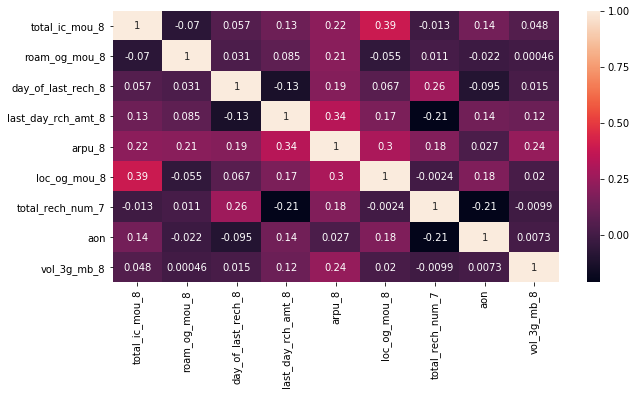

In [140]:
plt.figure(figsize = (10, 5))
sns.heatmap(X_train[kpi_results_without_corr].corr(), annot = True)
plt.show()

#### Plotting all vs uncorelated KPI

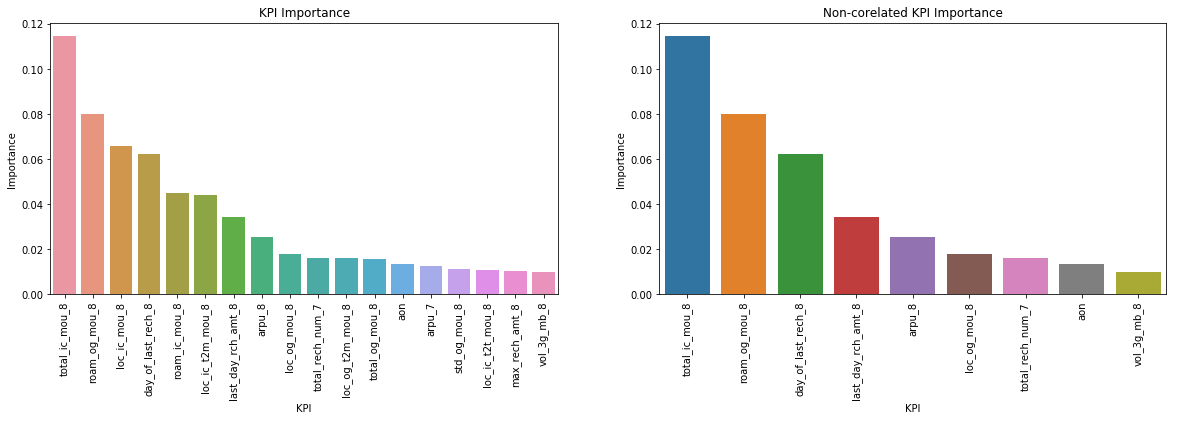

In [141]:
plt.figure(figsize=(20, 5))

plt.subplot(121)

feature_plot = sns.barplot(x='column_name', y= 'importance', data=kpi_feature_results, 
                           order = kpi_feature_results['column_name'])
feature_plot.set(xlabel = 'KPI', ylabel = 'Importance', title='KPI Importance')

for label in feature_plot.get_xticklabels():
    label.set_rotation(90)

plt.subplot(122)

feature_plot = sns.barplot(x='column_name', y= 'importance', data=kpi_feature_results_without_corr, 
                           order = kpi_feature_results_without_corr['column_name'])
feature_plot.set(xlabel = 'KPI', ylabel = 'Importance', title='Non-corelated KPI Importance')

for label in feature_plot.get_xticklabels():
    label.set_rotation(90)
    
plt.show()

#### Validating selected KPI with chosen model

False Positive Rate : [0.       0.144641 1.      ]
True Positive Rate : [0.         0.89038462 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.872871808212599
Accuracy Score : 0.8575779727095516
Precision Score : 0.293968253968254
Recall Score : 0.8903846153846153
F1 Score : 0.4420047732696898
Confusion Matrix : 
 [[6576 1112]
 [  57  463]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7688
           1       0.29      0.89      0.44       520

    accuracy                           0.86      8208
   macro avg       0.64      0.87      0.68      8208
weighted avg       0.95      0.86      0.89      8208



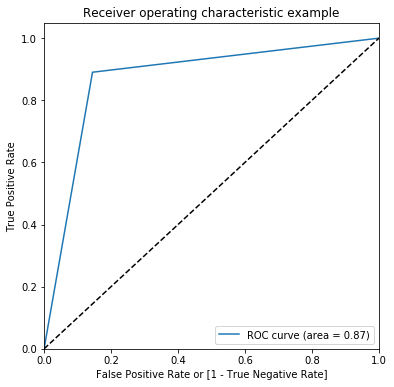

In [142]:
X_train_kpi_without_corr = X_train_downsampled[kpi_results_without_corr]

kpi_selected_model = copy.deepcopy(xg_boost_final_model)

kpi_selected_model.fit(X_train_kpi_without_corr, y_train_downsampled)

X_test_kpi_without_corr = X_test[kpi_results_without_corr]

y_pred_with_kpi = kpi_selected_model.predict(X_test_kpi_without_corr)

analyse_model(y_test, y_pred_with_kpi)

<b>Selected KPI have comparable performance with the chosen model. Hence, choice of KPI seems to be correct. </b>

#### Plotting selected KPI distribution for Churn vs Non-churn

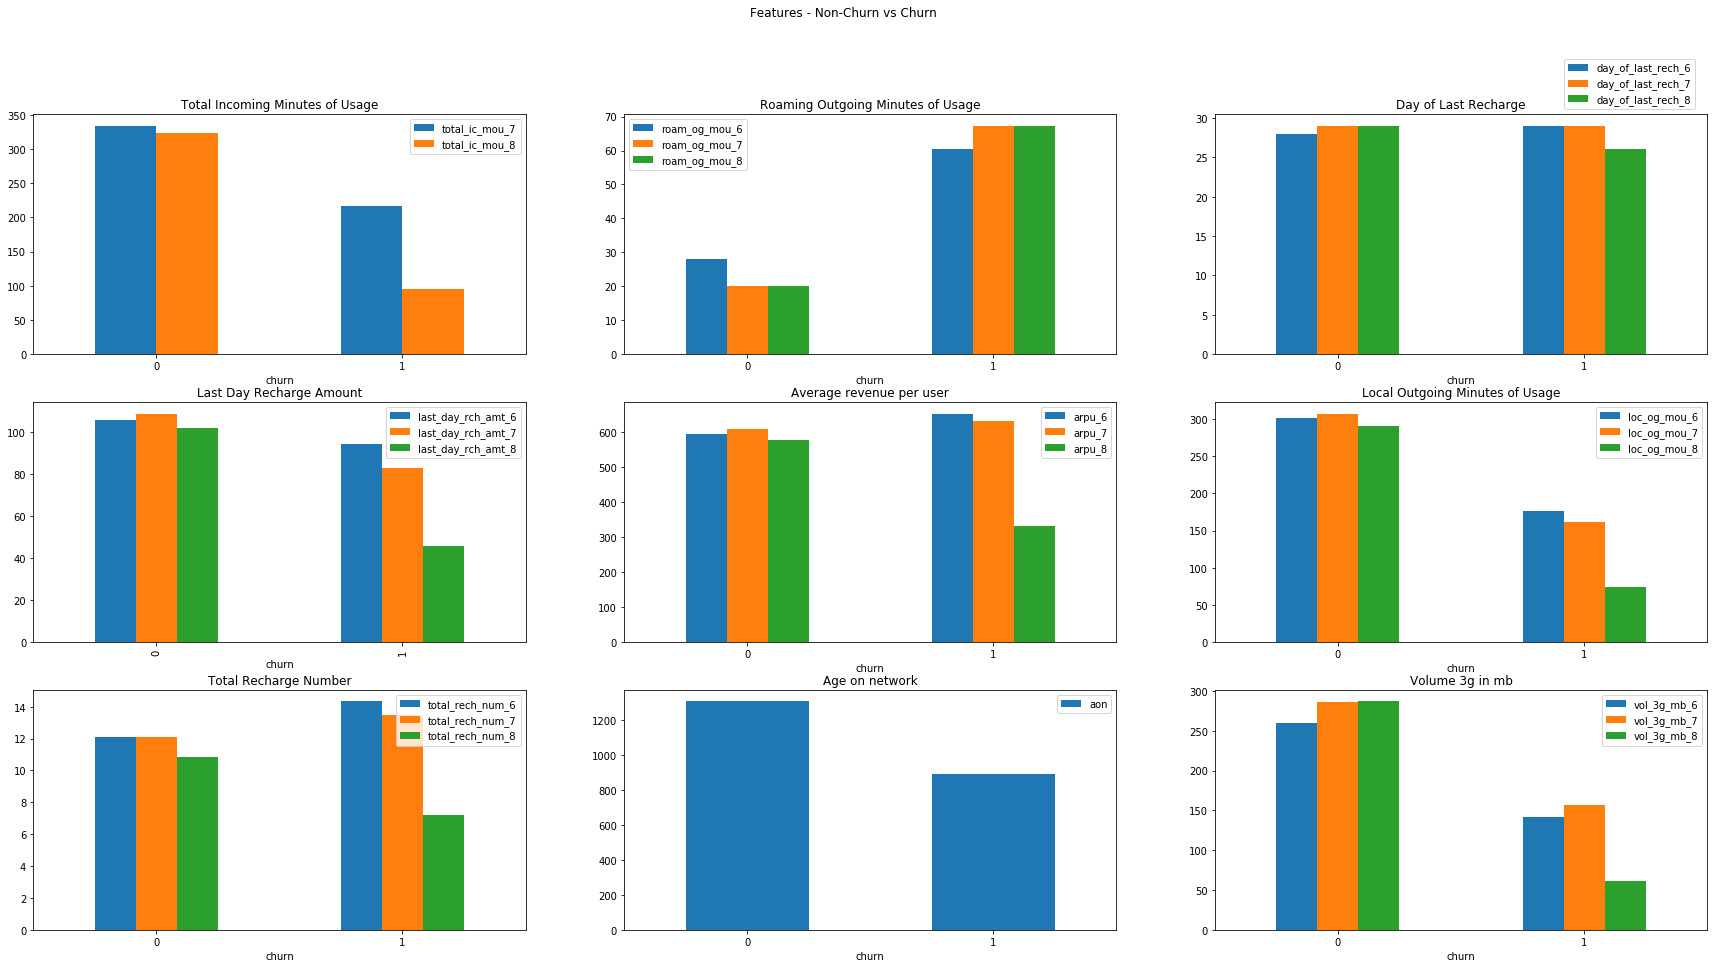

In [143]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (30,15))

plt.suptitle('Features - Non-Churn vs Churn')

total_ic_mou_df = final_df.groupby(['churn'])['total_ic_mou_7', 'total_ic_mou_8'].mean()
total_ic_mou_ax = total_ic_mou_df.plot.bar(ax=axes[0,0], title = 'Total Incoming Minutes of Usage', rot = 0)
total_ic_mou_ax.legend(loc='upper right')

roam_og_mou_df = final_df.groupby(['churn'])['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'].mean()
roam_og_mou_ax = roam_og_mou_df.plot.bar(ax=axes[0,1], title = 'Roaming Outgoing Minutes of Usage', rot = 0)
roam_og_mou_ax.legend(loc='upper left')

day_of_last_rech_df = final_df.groupby(['churn'])['day_of_last_rech_6', 'day_of_last_rech_7', 'day_of_last_rech_8'].median()
day_of_last_rech_ax = day_of_last_rech_df.plot.bar(ax=axes[0, 2], title = 'Day of Last Recharge', rot = 0)
day_of_last_rech_ax.legend(bbox_to_anchor=(0.7, 1))

last_day_rch_amt_df = final_df.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].mean()
last_day_rch_amt_ax = last_day_rch_amt_df.plot.bar(ax=axes[1, 0], title = 'Last Day Recharge Amount')
last_day_rch_amt_ax.legend(loc='upper right')

arpu_df = final_df.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].mean()
arpu_df_ax = arpu_df.plot.bar(ax=axes[1, 1], title = 'Average revenue per user', rot = 0)
arpu_df_ax.legend(loc='upper right')

loc_og_mou_df = final_df.groupby(['churn'])['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'].mean()
loc_og_mou_ax = loc_og_mou_df.plot.bar(ax=axes[1, 2], title = 'Local Outgoing Minutes of Usage', rot = 0)
loc_og_mou_ax.legend(loc='upper right')

total_rech_num_df = final_df.groupby(['churn'])['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'].mean()
total_rech_num_ax = total_rech_num_df.plot.bar(ax=axes[2, 0], title = 'Total Recharge Number', rot = 0)
total_rech_num_ax.legend(loc='upper right')

aon_df = final_df.groupby(['churn'])['aon'].mean()
aon_ax = aon_df.plot.bar(ax=axes[2, 1], title = 'Age on network', rot = 0)
aon_ax.legend(loc='upper right')

vol_3g_mb_df = final_df.groupby(['churn'])['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'].mean()
vol_3g_mb_ax = vol_3g_mb_df.plot.bar(ax=axes[2, 2], title = 'Volume 3g in mb', rot = 0)
vol_3g_mb_ax.legend(loc='upper right')


plt.show()

#### Inferences

1) Average <b>Total Incoming Minutes of Usage</b> for <b>Churn</b> customer is <b>less</b> than the <b>Non-Churn</b> customer. In <b>Action</b> phase, it remains somewhat <b>similar</b> for <b>Non-Churn</b> customer but <b>decreases sharply</b> for <b>Churn</b> customer.
- This implies a clear behaviour pattern between Churn and Non-churn customer for <b>Total Incoming Minutes of Usage</b>.

2) Average <b>Roaming Outgoing Minutes of Usage</b> for <b>Churn</b> customer is <b>far greater</b> than the <b>Non-Churn</b> customer. In <b>Action</b> phase, it remains <b>similar</b> for <b>Non-Churn</b> customer and <b>Churn</b> customer.
- This implies a clear behaviour pattern between Churn and Non-churn customer for <b>Roaming Outgoing Minutes of Usage</b>. 

3) Median of <b>Day of Last Recharge </b> shows similar trend for <b>Churn</b> customer and <b>Non-Churn</b> customer. In <b>Action</b> phase, it remains <b>similar</b> for <b>Non-Churn</b> customer but <b>decreases a bit</b> for <b>Churn</b> customer.
-  No inference can be drawn from this.

4) Average <b>Last Day Recharge Amount</b> for <b>Churn</b> customer is <b>less</b> than the <b>Non-Churn</b> customer. For <b>Churn</b> customer, it keeps on decreasing consistently. For <b>Non-Churn</b> customer it remains similar.
- This implies a clear behaviour pattern between Churn and Non-churn customer for <b>Last Day Recharge Amount</b>.

5) <b>Average revenue per user</b> for <b>Churn</b> customer is <b>greater</b> than the <b>Non-Churn</b> customer. For <b>Churn</b> customer, it decreasing consistently in <b>Good</b> phase and decreases sharply in <b>Action</b> phase. For <b>Non-Churn</b> customer it remains somewhat similar.
- This implies a clear behaviour pattern between Churn and Non-churn customer for <b>Average revenue per user</b>.

6) Average <b>Local Outgoing Minutes of Usage</b> for <b>Churn</b> customer is <b>far lesser</b> than the <b>Non-Churn</b> customer. For <b>Churn</b> customer, it decreasing consistently in <b>Good</b> phase and decreases sharply in <b>Action</b> phase. For <b>Non-Churn</b> customer it remains somewhat similar.
- This implies a clear behaviour pattern between Churn and Non-churn customer for <b>Local Outgoing Minutes of Usage</b>.

7) Average <b>Total Rechage Number</b> for <b>Churn</b> customer is <b>greater</b> than the <b>Non-Churn</b> customer. For <b>Churn</b> customer, it decreasing consistently in <b>Good</b> phase and decreases sharply in <b>Action</b> phase. For <b>Non-Churn</b> customer it remains somewhat similar.
- This implies a clear behaviour pattern between Churn and Non-churn customer for <b>Total Rechage Number</b>.

8) Average <b>Age On Network</b> for <b>Churn</b> customer is <b>far lesser</b> than the <b>Non-Churn</b> customer.
- This implies a clear behaviour pattern between Churn and Non-churn customer for <b>Age On Network</b>.

9) Average <b>Volume 3g in Mb</b> for <b>Churn</b> customer is <b>far less</b> than the <b>Non-Churn</b> customer. For <b>Churn</b> customer, it remains somewhat similar in <b>Good</b> phase and decreases sharply in <b>Action</b> phase. For <b>Non-Churn</b> customer it remains somewhat similar.
- This implies a clear behaviour pattern between Churn and Non-churn customer for <b>Volume 3g in Mb</b>.

#### Recommended Strategy

Churn customers have clear distinct behavioural usage pattern when compared to Non-Churn customers. 
<br><br>
1) <b>Churn customers</b> are using <b>more roaming outgoing calls</b>, generating <b>more average revenue per user</b> as compared to Non-Churn customers. Hence, they seem to be a part of customer-base <b>frequently travelling between different circles</b>. This further gets supported by the fact that <b>Age on Network</b> for Churn customers is also <b>less</b> as compared to Non-Churn customers as they seem to be <b>frequently switching</b> telecom for <b>cost saving</b>. Also, the same is supported by the fact that the <b>Churn customers</b> recharges with <b>lesser amount but more frequently</b> when compared to <b>Non-churn customers</b>. They seem to be recharging as and when required. 

2) <b>Non-Churn customers</b> are using <b>more Local Outgoing calls, Local Incoming calls and 3g volume</b> as compared to Churn customers. Hence, they seem to be a part of customer-base <b>operating within same circle</b>.

<b>Customers seem to be churning for some cost saving</b>. <b>Hence, for retaining customers, Telecom can introduce special Recharge Packs for Roaming Outgoing calls which would subsidize the calls for the customer. Hence, ensuring some cost saving for the customer. 

Although, this would result in decrease of average revenue from those customers but the proposed strategy could help in resolving the potential issue of churning and incentivize customers to continue with the telecom. 

Reducing rate of churning customers should help in compensating for decrease in average revenue from customers and improving profits by retaining high value customers.</b>